# *Modelo de Churn en Telefónica Prepaga*

## Descripción
 Una empresa de telefonía prepaga necesita predecir, dentro de el conjunto de sus clientes, cuál de ellos dejará de realizar recargas a su línea telefónica en las próximas 4 semanas. Es decir, cada cliente realiza recargas a su línea de forma regular y en algún momento dejan de hacerlo. Lo que se pretende es saber es cuáles de ellos no realizaran un recarga en el periodo de tiempo definido ante-riormente.

## Set de Datos
El set de datos corresponde a usuarios de la telefónica, el cual brinda diferente información acerca de ellos y de sus consumos durante un período de 12 semanas, más 4 semanas en las cual se eva-luará la predicción del modelo.

## Output del Modelo
Tabla con Línea de Cliente y Probabilidad de No recargar en las próximas 4 semanas.

## Disposición de los Dataframes: DATASET (Azul) y TAG (Rojo)
-----------------------------------------------------------------------------------------------------------------

<img src="Imagenes/Cronograma2.PNG">

# -----------------------------------------------------------------------------------------------------------
# ETAPA 1: Recolección de Datos y 1º Análisis

### Importamos Librerias y Datasets

In [3]:
#importamos las librerias necesarias para trabajar en el primer TP

import xgboost as xgb  #Libreria de algoriitmo de boosting, sive para hacer la prediccion
from sklearn.metrics import classification_report, confusion_matrix 
import pandas as pd               #Manejo de Datos
import numpy as np                #Calculo numerico
import seaborn as sns             #Libreria de Visualizaciones
import matplotlib.pyplot as plt   #Libreria de Visualizaciones

In [2]:
#Cargamos el dataset, NUNCA OLVIDAR EL SEPARADOR

data = pd.read_csv("Dataset/norech4w_20190908_abt_data.txt", sep='|') #Es el Dataset de Datos Historicos con el que entrenaremos el Modelo.
tag = pd.read_csv("Dataset/norech4w_20190908_abt_tag.txt", sep='|') #Es el Dataset Objetivo, con el que validaremos el modelo.

### Aqui Evaluaremos las Dimensiones de los Dataframes y la Estadística Descriptiva del Dataset

In [6]:
#Modificar dimensiones predeterminadas de visibilidad de columnas y filas
x = 212
pd.set_option('display.max_columns', x) #Maximo de columnas a ver
pd.set_option('display.max_rows', x) #Maximo de Filas a ver

In [4]:
#Exhibición de las primeras 5 filas por defecto (podemos indicar dentro del parentesis cuantas queremos mostrar)
data.head()

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,EXPDTR_DATA_ARPU_AMT_M1,EXPDTR_DATA_ARPU_AMT_M2,EXPDTR_DATA_ARPU_AMT_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,SMS_OFFNET_EXP_ARPU_AMT_M1,SMS_OFFNET_EXP_ARPU_AMT_M2,SMS_OFFNET_EXP_ARPU_AMT_M3,SMS_ONNET_EXP_ARPU_AMT_M1,SMS_ONNET_EXP_ARPU_AMT_M2,SMS_ONNET_EXP_ARPU_AMT_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,SPNDG_VOI_ONNET_ARPU_M1,SPNDG_VOI_ONNET_ARPU_M2,SPNDG_VOI_ONNET_ARPU_M3,SPNDG_VOI_OFFNET_ARPU_M1,SPNDG_VOI_OFFNET_ARPU_M2,SPNDG_VOI_OFFNET_ARPU_M3,USE_LCL_VOI_AMT_M1,USE_LCL_VOI_AMT_M2,USE_LCL_VOI_AMT_M3,SPNDG_VOI_INTRNTL_ARPU_M1,SPNDG_VOI_INTRNTL_ARPU_M2,SPNDG_VOI_INTRNTL_ARPU_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12
0,E_67773005_20190427,08-SEP-19,9.41650,-82.52070,-82.52000,9.43000,2 - GOLD,3-DO,VD3,NEW,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,27-APR-19,6,6,4,5,6,6.0,9.0,17.0,5,0,4,0,4,3,3,04-SEP-19,6,"N/A,1;UGW,8",3,0,3,0,3,3,0,3,4,3,3,0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,7.0,5.0,5.0,0.0,1.25,4.94,3.05,0.0,0.96,0.0,18,325,393,20,163,137,874,3356,1226,-904.75,-3833.06,-1746.9

In [5]:
#Exhibición de las primeras 5 filas por defecto (podemos indicar dentro del parentesis cuantas queremos mostrar)
tag.head() 

,SUSCRIBER_KEY,PREP_RECH_AMT_W_0,PREP_RECH_AMT_W_1,PREP_RECH_AMT_W_2,PREP_RECH_AMT_W_3,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3
0,CW_DPRE_67759547_20150701,6.0,7.5,6.0,5.0,4,5,3,1
1,CW_DPRE_66948838_20171126,3.0,0.0,1.5,6.3,1,0,1,4
2,CW_DPRE_68858157_20180607,0.0,3.0,0.0,0.0,0,1,0,0
3,CW_DPRE_65464761_20181014,0.0,4.5,0.0,0.0,0,2,0,0
4,CW_DPRE_67448216_20150701,5.0,0.0,3.0,0.0,1,0,1,0


In [6]:
#Con este metodo obtenemos una descripcion aritmetica respecto a las variables
data.describe()

,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,EXPDTR_DATA_ARPU_AMT_M1,EXPDTR_DATA_ARPU_AMT_M2,EXPDTR_DATA_ARPU_AMT_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,SMS_OFFNET_EXP_ARPU_AMT_M1,SMS_OFFNET_EXP_ARPU_AMT_M2,SMS_OFFNET_EXP_ARPU_AMT_M3,SMS_ONNET_EXP_ARPU_AMT_M1,SMS_ONNET_EXP_ARPU_AMT_M2,SMS_ONNET_EXP_ARPU_AMT_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,SPNDG_VOI_ONNET_ARPU_M1,SPNDG_VOI_ONNET_ARPU_M2,SPNDG_VOI_ONNET_ARPU_M3,SPNDG_VOI_OFFNET_ARPU_M1,SPNDG_VOI_OFFNET_ARPU_M2,SPNDG_VOI_OFFNET_ARPU_M3,USE_LCL_VOI_AMT_M1,USE_LCL_VOI_AMT_M2,USE_LCL_VOI_AMT_M3,SPNDG_VOI_INTRNTL_ARPU_M1,SPNDG_VOI_INTRNTL_ARPU_M2,SPNDG_VOI_INTRNTL_ARPU_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12
count,965133.000000,965133.000000,965133.000000,965133.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.000000,967340.

In [7]:
tag.shape #Dimension del TAG

(967340, 9)

In [8]:
data.shape #Dimension del DATASET

(967340, 212)

### Modificacion del TAG
Luego de Revisar el TAG, se puede observar que es innecesario contar con la informacion de la cantidad de montos que tiene cada Usuario, ya que solo nos interesa saber si Recargaron o no el Servicio en las ultimas Semanas.
Por ende, procedemos a Borrar todas las columnas 'PREP_RECH_AMT_W_X'.

In [9]:
#Borramos las columnas usando el metodo drop, si queremos que se modifique el TAG en el momento, decimos: inplace=True
tag.drop(columns=['PREP_RECH_AMT_W_0','PREP_RECH_AMT_W_1', 'PREP_RECH_AMT_W_2', 'PREP_RECH_AMT_W_3'], inplace=True)

In [10]:
tag.head() #Corroboramos que las columnas han sido eliminadas

,SUSCRIBER_KEY,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3
0,CW_DPRE_67759547_20150701,4,5,3,1
1,CW_DPRE_66948838_20171126,1,0,1,4
2,CW_DPRE_68858157_20180607,0,1,0,0
3,CW_DPRE_65464761_20181014,0,2,0,0
4,CW_DPRE_67448216_20150701,1,0,1,0


### Corroboramos Qué Usuarios cargaron o no cargaron
Lo que se hace para esto, es crear una nueva columna en el TAG, la cual recibira el nombre de "Total", y en la misma, iremos sumando columna a columna, el total por fila de recargas por cliente.

In [11]:
#Creamos una columna llamada 'Total', y sumamos todas las columnas por cada fila, y escribimos cada resultado en Total
tag['Total'] = tag[['PREP_RECH_Q_EVT_W_0','PREP_RECH_Q_EVT_W_1','PREP_RECH_Q_EVT_W_2','PREP_RECH_Q_EVT_W_3']].sum(axis=1)

In [12]:
tag.head()

,SUSCRIBER_KEY,PREP_RECH_Q_EVT_W_0,PREP_RECH_Q_EVT_W_1,PREP_RECH_Q_EVT_W_2,PREP_RECH_Q_EVT_W_3,Total
0,CW_DPRE_67759547_20150701,4,5,3,1,13
1,CW_DPRE_66948838_20171126,1,0,1,4,6
2,CW_DPRE_68858157_20180607,0,1,0,0,1
3,CW_DPRE_65464761_20181014,0,2,0,0,2
4,CW_DPRE_67448216_20150701,1,0,1,0,2


------------------------------------------------------------------------------------------------------------------------------
Dado que ahora ya sabemos si los usuarios cargaron o no, podemos eliminar ya las columnas que usamos para obtener estos datos, ya que no las necesitamos más. PROCEDEMOS:

In [13]:
tag.drop(columns = ['PREP_RECH_Q_EVT_W_0','PREP_RECH_Q_EVT_W_1','PREP_RECH_Q_EVT_W_2','PREP_RECH_Q_EVT_W_3'], inplace=True)

In [14]:
tag.head()

,SUSCRIBER_KEY,Total
0,CW_DPRE_67759547_20150701,13
1,CW_DPRE_66948838_20171126,6
2,CW_DPRE_68858157_20180607,1
3,CW_DPRE_65464761_20181014,2
4,CW_DPRE_67448216_20150701,2


------------------------------------------------------------------------------------------------------------------------------
Lo que hay que lograr ahora, es saber de manera Binaria, quién cargó y quién no recargó. Para eso, lo que se hace es generar una condicion Booleana, y los Usuarios que SI hayan cargado sean CERO (False), siendo los Usuarios que NO cargaron NUESTRO REAL OBJETIVO iguales a UNO (True).

In [15]:
#Planteamos la condicion, y eso nos devolvera True o False, a ese resultado por fila, lo transformamos en 'int'
tag['Total'] = (tag['Total']==0).astype(int)

In [16]:
tag.head()

,SUSCRIBER_KEY,Total
0,CW_DPRE_67759547_20150701,0
1,CW_DPRE_66948838_20171126,0
2,CW_DPRE_68858157_20180607,0
3,CW_DPRE_65464761_20181014,0
4,CW_DPRE_67448216_20150701,0


### Unión de los Dos DATAFRAMES
Ahora tenemos que unir el Dataset con el TAG y tener todos los datos en un mismo Dataframe. Para eso nos topamos con un primer problema que es: los usuarios del TAG, presentan una SUSCRIBER_KEY con SEIS caracteres más que los mismos pero del Dataset. Corregiremos ese error y los igualaremos.

In [17]:
#Aquí lo que hicimos fue modificar que parte del String queriamos que se viera en cada fila de la columna 'SUSCRIBER_KEY'
tag['SUSCRIBER_KEY'] = tag['SUSCRIBER_KEY'].str[6:]

In [18]:
tag.head()

,SUSCRIBER_KEY,Total
0,E_67759547_20150701,0
1,E_66948838_20171126,0
2,E_68858157_20180607,0
3,E_65464761_20181014,0
4,E_67448216_20150701,0


Una vez corregido ese ERROR, procedemos a realizar el Merge entre el DATASET y el TAG, Uniendolos atravez de la Columna 'SUSCRIBER_KEY' y agregandose asi por defecto, la columna 'Total' junto a las otras columnas del Dataset. Llamaremos a este nuevo Dataframe como: 'fulldata'

In [19]:
#El Merge se debe utilizar como metodo respecto a un dataframe, luego como parametros le decimos a que otro Dataframe
# lo unimos y cual sera la columna Unificada.
fulldata = data.merge(tag, on = 'SUSCRIBER_KEY')

In [20]:
fulldata.head()

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,EXPDTR_DATA_ARPU_AMT_M1,EXPDTR_DATA_ARPU_AMT_M2,EXPDTR_DATA_ARPU_AMT_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,SMS_OFFNET_EXP_ARPU_AMT_M1,SMS_OFFNET_EXP_ARPU_AMT_M2,SMS_OFFNET_EXP_ARPU_AMT_M3,SMS_ONNET_EXP_ARPU_AMT_M1,SMS_ONNET_EXP_ARPU_AMT_M2,SMS_ONNET_EXP_ARPU_AMT_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,SPNDG_VOI_ONNET_ARPU_M1,SPNDG_VOI_ONNET_ARPU_M2,SPNDG_VOI_ONNET_ARPU_M3,SPNDG_VOI_OFFNET_ARPU_M1,SPNDG_VOI_OFFNET_ARPU_M2,SPNDG_VOI_OFFNET_ARPU_M3,USE_LCL_VOI_AMT_M1,USE_LCL_VOI_AMT_M2,...,SPNDG_VOI_INTRNTL_ARPU_M1,SPNDG_VOI_INTRNTL_ARPU_M2,SPNDG_VOI_INTRNTL_ARPU_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,Total
0,E_67773005_20190427,08-SEP-19,9.41650,-82.52070,-82.52000,9.43000,2 - GOLD,3-DO,VD3,NEW,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,27-APR-19,6,6,4,5,6,6.0,9.0,17.0,5,0,4,0,4,3,3,04-SEP-19,6,"N/A,1;UGW,8",3,0,3,0,3,3,0,3,4,3,3,0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,7.0,5.0,5.0,0.0,1.25,4.94,3.05,0.0,0.96,0.0,18,325,393,20,163,137,874,3356,1226,-904.75,-3833.06,-1746.95,0,0,0,0

In [21]:
fulldata.shape #Como se puede observar, el numero de filas se conservó y solo aumento en UNO la cantidad de Columnas (Total)

(967340, 213)

Transformamos el nombre de 'Total' en 'TARGET', buscando tener Buenas Practicas en cuanto a Nomenclatura

In [22]:
#Usamos el Metodo rename, y pasamos la clave de la columna que queremos modificar, y el nuevo nombre que queremos asignar
fulldata.rename(columns = {'Total': 'TARGET'}, inplace = True)

In [23]:
fulldata.head() #La columna ahora se llama TARGET

,SUSCRIBER_KEY,FECHA_CORTE,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,SOURCE,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,EXPDTR_DATA_ARPU_AMT_M1,EXPDTR_DATA_ARPU_AMT_M2,EXPDTR_DATA_ARPU_AMT_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,SMS_OFFNET_EXP_ARPU_AMT_M1,SMS_OFFNET_EXP_ARPU_AMT_M2,SMS_OFFNET_EXP_ARPU_AMT_M3,SMS_ONNET_EXP_ARPU_AMT_M1,SMS_ONNET_EXP_ARPU_AMT_M2,SMS_ONNET_EXP_ARPU_AMT_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,SPNDG_VOI_ONNET_ARPU_M1,SPNDG_VOI_ONNET_ARPU_M2,SPNDG_VOI_ONNET_ARPU_M3,SPNDG_VOI_OFFNET_ARPU_M1,SPNDG_VOI_OFFNET_ARPU_M2,SPNDG_VOI_OFFNET_ARPU_M3,USE_LCL_VOI_AMT_M1,USE_LCL_VOI_AMT_M2,...,SPNDG_VOI_INTRNTL_ARPU_M1,SPNDG_VOI_INTRNTL_ARPU_M2,SPNDG_VOI_INTRNTL_ARPU_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,TARGET
0,E_67773005_20190427,08-SEP-19,9.41650,-82.52070,-82.52000,9.43000,2 - GOLD,3-DO,VD3,NEW,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,27-APR-19,6,6,4,5,6,6.0,9.0,17.0,5,0,4,0,4,3,3,04-SEP-19,6,"N/A,1;UGW,8",3,0,3,0,3,3,0,3,4,3,3,0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,7.0,5.0,5.0,0.0,1.25,4.94,3.05,0.0,0.96,0.0,18,325,393,20,163,137,874,3356,1226,-904.75,-3833.06,-1746.95,0,0,0,

Y con esto ultimo hecho, ya tenemos Nuestro Dataframe listo para trabajar, lo unico que si... eliminaremos los otros datasets viejos para liberar espacio en la memoria. PROCEDEMOS:

In [24]:
#Hacemos uso del termino reservado 'del' (delete) para borrar los dataframes viejos
del data
del tag

# -----------------------------------------------------------------------------------------------------------
# ETAPA 2: Limpieza y Curación de Datos

### Comprobamos si existen Columnas Innecesarias
Es decir, los datos siempre son importantes, pero si por cada columnas los mismos se repiten uniformemente, esa columna no estará aportando valor para ayudar al algoritmo a predecir lo que nos interesa, por ende identificaremos esas columnas y las eliminaremos.

------------------------------------------------------------------------------------------------------------------------------
Este ciclo 'for', se lee asi: "TODA COLUMNA, que se encuentre dentro del FULLDATA, siempre y cuando tenga como cantidad de valores únicos igual a UNO, y despues las imprime de manera predeterminada

In [25]:
[columna for columna in fulldata.columns if fulldata[columna].nunique() == 1] #Usamos el ciclo for para encontrar valores unicos

['FECHA_CORTE', 'SOURCE']

In [26]:
#Eliminamos las columnas encontradas anteriormente
fulldata.drop(columns = ['FECHA_CORTE', 'SOURCE'], inplace=True)

In [27]:
fulldata.shape #Las columnas han sido eliminadas correctamente

(967340, 211)

### Eliminamos Columnas por Conocimiento del Dominio
Ésto es sabido de manera predeterminada, ya que la misma Empresa nos avisa de las columnas que se encuentran en desuso o que no son relevantes para la gestion y analisis de su Negocio día a día.

In [28]:
#Creamps una lista con los nombres de las columnas
columnsToDelete=["SPNDG_VOI_ONNET_ARPU_M1",
"SPNDG_VOI_ONNET_ARPU_M2",
"SPNDG_VOI_ONNET_ARPU_M3",
"SPNDG_VOI_OFFNET_ARPU_M1",
"SPNDG_VOI_OFFNET_ARPU_M2",
"SPNDG_VOI_OFFNET_ARPU_M3",
"USE_LCL_VOI_AMT_M1",
"USE_LCL_VOI_AMT_M2",
"USE_LCL_VOI_AMT_M3",
"SPNDG_VOI_INTRNTL_ARPU_M1",
"SPNDG_VOI_INTRNTL_ARPU_M2",
"SPNDG_VOI_INTRNTL_ARPU_M3",
"SMS_OFFNET_EXP_ARPU_AMT_M1",
"SMS_OFFNET_EXP_ARPU_AMT_M2",
"SMS_OFFNET_EXP_ARPU_AMT_M3",
"SMS_ONNET_EXP_ARPU_AMT_M1",
"SMS_ONNET_EXP_ARPU_AMT_M2",
"SMS_ONNET_EXP_ARPU_AMT_M3",
"EXPDTR_DATA_ARPU_AMT_M1",
"EXPDTR_DATA_ARPU_AMT_M2",
"EXPDTR_DATA_ARPU_AMT_M3"]

In [29]:
fulldata.drop(columns = columnsToDelete, inplace=True) #Eliminamos las mismas pasando como parametro la variable que contiene las columnas

In [30]:
fulldata.shape #Verificamos y si se han eliminado satisfactoriamente las columnas

(967340, 190)

### Revisamos si Existen Filas Duplicadas

In [31]:
#Llamamos al metodo duplicated(), y seguido el metodo sum(), para asi contar cuantas filas hay duplicadas
fulldata.duplicated().sum() #No hay Filas Duplicadas

0

### Revisamos si Existen Faltantes o Datos Nulos

In [32]:
#Para ésto, haremos uso del método print()
#Creamos un ciclo for para iterar todas las filas por columna buscando los nulos o faltantes
nullColumns = []    #Lista que contendrá las columnas con valores Nulos
for column in fulldata.columns:
    if fulldata[column].isnull().sum() > 0:
        print(column, fulldata[column].isnull().sum())
        nullColumns.append(column)

LAT_PROV_BTS 2207
LON_PROV_BTS 2207
LAT_CITY_BTS 2207
LON_CITY_BTS 2207
DEVICE_MODEL_NAME 2774
DEVICE_VENDOR_NAME 2774
NETWORK_TECH 222740


Una vez sabido cuales son las columnas que poseen valores Nulos, graficamos para visualizar sus Dimensiones:

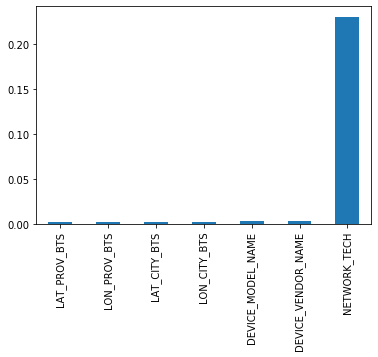

In [33]:
#Gráfico de Barras para visualizar mejor los nulls de cada columna
#Filtro las columnas, sumo sus nulls, los divido por la cantidad total de filas, y grafico la cantidad de nulls en relacion al total de filas
fulldata[nullColumns].isnull().sum().div(fulldata.shape[0]).plot.bar();

### Limpieza de las Columnas con Valores Nulos encontrados
Procedemos a utilizar distintos Métodos para limpiar los Nulos....

In [34]:
#Vemos la cantidad de repetición de los datos categóricos, el mas repetido sin dudas es 'LTE'
fulldata['NETWORK_TECH'].value_counts()

LTE    452105
3G     262811
2G      29684
Name: NETWORK_TECH, dtype: int64

Aqui procederemos a utulizar el Metodo de Imputación, reemplazando los valores nulos, por el valor que presente mayor frecuencuencia en la Serie (Moda). En este caso será el categorico 'LTE'

In [35]:
#Usaremos el valor 'LTE' para reemplazar los 'nulls' de la columna
fulldata.loc[fulldata['NETWORK_TECH'].isnull(), 'NETWORK_TECH'] = 'LTE'

In [36]:
#Verificamos que ya no hayan Nulos y seguimos
fulldata['NETWORK_TECH'].isnull().sum() 

0

------------------------------------------------------------------------------------------------
Procedemos ahora a analizar las columnas 'DEVICE_MODEL' y 'DEVICE_VENDOR'.

In [37]:
fulldata['DEVICE_MODEL_NAME'].value_counts()

NOT_IDENTIFIED                           130055
GALAXY GRAND PRIME DUOS (SM-G532M DS)    102151
GALAXY GRAND NEO (GT-I9060C)              27717
GALAXY J7 DUOS LTE (SM-J700MDS)           23214
Y5 2018 (DRA-LX3)                         20181
                                          ...  
ENERGY S550                                   1
ROKR E8                                       1
ONEVX                                         1
SGH-E256                                      1
V6                                            1
Name: DEVICE_MODEL_NAME, Length: 3550, dtype: int64

In [38]:
fulldata['TENURE_CUSTOMER_BL'].value_counts()

SAMSUNG            485705
HUAWEI             167562
NOT_IDENTIFIED     130055
LG                  50041
BLU                 29824
                    ...  
ETOWAY                  1
MFU                     1
WALTONDIGI-TECH         1
EMPORIA                 1
CCE                     1
Name: DEVICE_VENDOR_NAME, Length: 309, dtype: int64

Observemos que hay una categoria de 'No Identificados' en ambas columnas, podemos unir los nulls a esa categoría

In [39]:
fulldata.loc[fulldata['DEVICE_MODEL_NAME'].isnull(), 'DEVICE_MODEL_NAME'] = 'NOT_IDENTIFIED'

In [40]:
fulldata.loc[fulldata['DEVICE_VENDOR_NAME'].isnull(), 'DEVICE_VENDOR_NAME'] = 'NOT_IDENTIFIED'

In [41]:
fulldata['DEVICE_MODEL_NAME'].isnull().sum() #Ya no hay Nulos en 'DEVICE_MODEL_NAME'

0

In [42]:
fulldata['DEVICE_VENDOR_NAME'].isnull().sum()  #Ya no hay Nulos en 'DEVICE_VENDOR_NAME'

0

------------------------------------------------------------------------------------------------
Por último, analizamos las Categorias de Latitud y Longitud
Por lo que puede obserarse entre la grafica de barras y el conteo de nulls por columna, las de LATITUD y LONGITUD tienen sus nulls en la mismas FILAS. Por Ende:

In [43]:
#Dejamos en el Dataframe, solo las filas que no son Nulas de 'LAT_PROV_BTS', con eso se eliminan los nulls de las otras tbn
fulldata = fulldata[fulldata['LAT_PROV_BTS'].notnull()]

Chequeamos que no queden mas Nulos en todo el DataFrame:

In [44]:
fulldata.isnull().sum().any() #Existe algun dato NUlO en todo el Dataframe?: FALSO

False

Y aquí terminamos el Proceso de Limpieza. Mas adelante, luego de analizar en más profundidad el Dominio del Dataframe, se vera de Transformar, Eliminar y Optimizar mas Columnas.

# -----------------------------------------------------------------------------------------------------------
# ETAPA 3: Profundizando en el Dominio y Optimizando el DataFrame

In [45]:
fulldata.shape #Dimensionamos nuevamente el Dataframe

(965133, 190)

In [46]:
fulldata.head(20) #Analizamos las Columnas Innecesarias

,SUSCRIBER_KEY,LAT_PROV_BTS,LON_PROV_BTS,LAT_CITY_BTS,LON_CITY_BTS,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_MODEL_NAME,DEVICE_VENDOR_NAME,NETWORK_TECH,COMMERCIAL_ACTIVATION_DATE,TENURE_CUSTOMER,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_Q_MON_12W,PREP_RECH_Q_TUE_12W,PREP_RECH_Q_WEN_12W,PREP_RECH_Q_THUR_12W,PREP_RECH_Q_FRI_12W,PREP_RECH_Q_SAT_12W,PREP_RECH_Q_SUN_12W,PREP_RECH_LAST_DAY_12W,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,PREP_RECH_Q_EVT_W1,PREP_RECH_Q_EVT_W2,PREP_RECH_Q_EVT_W3,PREP_RECH_Q_EVT_W4,PREP_RECH_Q_EVT_W5,PREP_RECH_Q_EVT_W6,PREP_RECH_Q_EVT_W7,PREP_RECH_Q_EVT_W8,PREP_RECH_Q_EVT_W9,PREP_RECH_Q_EVT_W10,PREP_RECH_Q_EVT_W11,PREP_RECH_Q_EVT_W12,PREP_RECH_AMT_W1,PREP_RECH_AMT_W2,PREP_RECH_AMT_W3,PREP_RECH_AMT_W4,PREP_RECH_AMT_W5,PREP_RECH_AMT_W6,PREP_RECH_AMT_W7,PREP_RECH_AMT_W8,PREP_RECH_AMT_W9,PREP_RECH_AMT_W10,PREP_RECH_AMT_W11,PREP_RECH_AMT_W12,TRD_M1,TRD_M2,TRD_M3,TRD_STR_M1,TRD_STR_M2,TRD_STR_M3,TRD_SN_M1,TRD_SN_M2,TRD_SN_M3,TRD_IM_M1,TRD_IM_M2,TRD_IM_M3,TRD_OTH_M1,TRD_OTH_M2,TRD_OTH_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,PACK_DATA_Q_W1,PACK_DATA_Q_W2,PACK_DATA_Q_W3,PACK_DATA_Q_W4,PACK_DATA_Q_W5,PACK_DATA_Q_W6,PACK_DATA_Q_W7,PACK_DATA_Q_W8,PACK_DATA_Q_W9,PACK_DATA_Q_W10,PACK_DATA_Q_W11,PACK_DATA_Q_W12,PACK_DATA_AMT_W1,PACK_DATA_AMT_W2,PACK_DATA_AMT_W3,PACK_DATA_AMT_W4,PACK_DATA_AMT_W5,PACK_DATA_AMT_W6,PACK_DATA_AMT_W7,PACK_DATA_AMT_W8,PACK_DATA_AMT_W9,PACK_DATA_AMT_W10,PACK_DATA_AMT_W11,PACK_DATA_AMT_W12,PACK_VOICE_Q_W1,PACK_VOICE_Q_W2,PACK_VOICE_Q_W3,PACK_VOICE_Q_W4,PACK_VOICE_Q_W5,PACK_VOICE_Q_W6,PACK_VOICE_Q_W7,PACK_VOICE_Q_W8,PACK_VOICE_Q_W9,PACK_VOICE_Q_W10,PACK_VOICE_Q_W11,PACK_VOICE_Q_W12,PACK_VOICE_AMT_W1,PACK_VOICE_AMT_W2,PACK_VOICE_AMT_W3,PACK_VOICE_AMT_W4,PACK_VOICE_AMT_W5,PACK_VOICE_AMT_W6,PACK_VOICE_AMT_W7,PACK_VOICE_AMT_W8,PACK_VOICE_AMT_W9,PACK_VOICE_AMT_W10,PACK_VOICE_AMT_W11,PACK_VOICE_AMT_W12,PACK_SMS_Q_W1,PACK_SMS_Q_W2,PACK_SMS_Q_W3,PACK_SMS_Q_W4,PACK_SMS_Q_W5,PACK_SMS_Q_W6,PACK_SMS_Q_W7,PACK_SMS_Q_W8,PACK_SMS_Q_W9,PACK_SMS_Q_W10,PACK_SMS_Q_W11,PACK_SMS_Q_W12,PACK_SMS_AMT_W1,PACK_SMS_AMT_W2,PACK_SMS_AMT_W3,PACK_SMS_AMT_W4,PACK_SMS_AMT_W5,PACK_SMS_AMT_W6,PACK_SMS_AMT_W7,PACK_SMS_AMT_W8,PACK_SMS_AMT_W9,PACK_SMS_AMT_W10,PACK_SMS_AMT_W11,PACK_SMS_AMT_W12,PACK_DATA_EXP_W1,PACK_DATA_EXP_W2,PACK_DATA_EXP_W3,PACK_DATA_EXP_W4,PACK_DATA_EXP_W5,PACK_DATA_EXP_W6,PACK_DATA_EXP_W7,PACK_DATA_EXP_W8,PACK_DATA_EXP_W9,PACK_DATA_EXP_W10,PACK_DATA_EXP_W11,PACK_DATA_EXP_W12,TARGET
0,E_67773005_20190427,9.41650,-82.52070,-82.52000,9.43000,2 - GOLD,3-DO,VD3,NOT_IDENTIFIED,NOT_IDENTIFIED,LTE,27-APR-19,6,6,4,5,6,6.0,9.0,17.0,5,0,4,0,4,3,3,04-SEP-19,6,"N/A,1;UGW,8",3,0,3,0,3,3,0,3,4,3,3,0,3.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,7.0,5.0,5.0,0.0,1.25,4.94,3.05,18,325,393,20,163,137,874,3356,1226,-904.75,-3833.06,-1746.95,0,0,0,0,0,0,7.33,357.00,329.57,0.77,0.30,2.45,8.10,357.30,332.02,0.00,0.0,0.00,6,7,6,5.49,7.50,13.00,0,0,0,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,3,0,4,3,3,4,3,3,4,3,3,0,1.50,0.00,2.49,1.50,1.50,3.00,1.50,1.50,3.00,5.00,5.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,4,11,7,13,11,9,11,12,9,9,0,0
1,E_65364767_20150701,8.58480,-82.38850,-81.82747,8.22436,1 - PLATINUM,1-HCV,HCV1,GALAXY J5 PRIME DUOS (SM-G570M DS),SAMSUNG,LTE,01-JUL-15,

### Identificación de Columnas Innecesarias para el Algoritmo Predictivo
Consideramos poco útil tener las coordenadas de la Provincia y la Ciudad, por lo que eliminaremos las pertenecientes a las mismas. No tenemos informacion que mantenga una relacion de Densidad de Poblacion entre una coordenada y otra, por lo que no nos parece que aporte valor.    
<ul>
<li>LAT_PROV_BTS</li>
<li>LON_PROV_BTS</li>
<li>LAT_CITY_BTS</li>
<li>LON_CITY_BTS</li>
</ul>

-------------------------------------------------------------------------------------------------------------

Al tener tantas categorias de 'MODELOS' de Celulares, vemos oportuno solo utilizar los datos acumulados de las 'MARCAS', ya que ésta Columna, es una 'RAMA PADRE' de los 'Modelos de Celular'.
<ul>
<li>DEVICE_MODEL_NAME</li>
</ul>

-------------------------------------------------------------------------------------------------------------

No nos parece importante saber la 'ANTIGUEDAD' de suscripción como cliente, ni la 'FECHA DE ACTIVACIÓN'; entendemos que la 'ANTIGUEDAD DESDE EL PRIMER GASTO' es el Unico dato Significativo.
<ul>
<li>COMMERCIAL_ACTIVATION_DATE</li>
<li>TENURE_CUSTOMER</li>
</ul>

-------------------------------------------------------------------------------------------------------------

Decidimos Utilizar los Datos almacenados por intervalos de MESES, y no por SEMANAS.
<ul>
<li>PREP_RECH_Q_MON_12W</li>
<li>PREP_RECH_Q_TUE_12W</li>
<li>PREP_RECH_Q_WEN_12W</li>
<li>PREP_RECH_Q_THUR_12W</li>
<li>PREP_RECH_Q_FRI_12W</li>
<li>PREP_RECH_Q_SAT_12W</li>
<li>PREP_RECH_Q_SUN_12W</li>
</ul>

-------------------------------------------------------------------------------------------------------------

En éste caso nos parece que el 'ULTIMO DIA DE RECARGA', es redundante respecto a 'DIAS DESDE LA ÚLTIMA RECARGA', y preferimos elegir el último mencionado, a razón de que posee datos Numericos a diferencia de la otra columna en cuestión, la cual posee datos Categóricos.
<ul>
<li>PREP_RECH_LAST_DAY_12W</li>
</ul>

-------------------------------------------------------------------------------------------------------------

Hemos optado por usar las Columnas que almacenan Datos segmentadas por Meses y no por Semanas, para así reducir el volumen de cómputo y hacer más eficiente el Analisis Exploratorio. Por ende, eliminaremos las columnas con Datos segmentados por 'SEMANA'
<ul>
<li>desde ---- 'PREP_RECH_Q_EVT_W1' ---- hasta ---- 'PREP_RECH_Q_EVT_W12'</li>
<li>desde ---- 'PREP_RECH_AMT_W1' ---- hasta ---- 'PREP_RECH_AMT_W12'</li>
<li>desde ---- 'PACK_DATA_Q_W1' -- hasta -- 'PACK_DATA_Q_W12'</li>
<li>desde ---- 'PACK_DATA_AMT_W1' -- hasta -- 'PACK_DATA_AMT_W12'</li>
<li>desde ---- 'PACK_VOICE_Q_W1' -- hasta -- 'PACK_VOICE_Q_W12'</li>
<li>desde ---- 'PACK_VOICE_AMT_W1' -- hasta -- 'PACK_VOICE_AMT_W12'</li>
<li>desde ---- 'PACK_SMS_Q_W1' -- hasta -- 'PACK_SMS_Q_W12'</li>
<li>desde ---- 'PACK_SMS_AMT_W1' -- hasta -- 'PACK_SMS_AMT_W12'</li>
<li>desde ---- 'PACK_DATA_EXP_W1' -- hasta -- 'PACK_DATA_EXP_W12'</li>
</ul>

-------------------------------------------------------------------------------------------------------------
Estos Datos, se encuentran Condensados en las Variables "TRAFICO DE DATOS MENSUAL", ('TRD_M1', 'TRD_M2'  y 'TRD_M3'), por ende, saber cómo se enfocó el tráfico de un Volúmen de Datos, en manera segmentada, no nos parece útil.
<ul>
<li>desde ---- 'TRD_STR_M1' ---- hasta ---- 'TRD_STR_M3'</li>
<li>desde ---- 'TRD_SN_M1' ---- hasta ---- 'TRD_SN_M3'</li>
<li>desde ---- 'TRD_IM_M1' ---- hasta ---- 'TRD_IM_M3'</li>
<li>desde ---- 'TRD_OTH_M1' ---- hasta ---- 'TRD_OTH_M3'</li>
</ul>

### Eliminación de Columnas Identificadas como Innecesarias
Procedemos a Eliminar las columnas anteriormente nombradas, para eso creamos un Array que esta compuesto por mas Arrays, el primero es uno que contiene Nombres de Columnas solitarias (sin otras que las acompañen con nombres parecidos), o Columnas con Nombres complicados para capturar atravez de un Filtro, a razón de que los mismos, coinciden con nombres de columnas ya existentes que si queremos. Por otro lado, los demases SubArrays, estan alimentados por ciclos 'for' cada uno, los cuales buscan un patrón de string coincidente con los Nombres de columnas buscados.

In [47]:
#Creamos un Array con el Nombre de todas las Columnas que eliminaremos
to_remove = (['LAT_PROV_BTS', 'LON_PROV_BTS', 'LAT_CITY_BTS', 'LON_CITY_BTS', 'DEVICE_MODEL_NAME', 'COMMERCIAL_ACTIVATION_DATE', 'TENURE_CUSTOMER', 
              'PREP_RECH_LAST_DAY_12W', 'PREP_RECH_Q_MON_12W', 'PREP_RECH_Q_TUE_12W', 'PREP_RECH_Q_WEN_12W', 
              'PREP_RECH_Q_THUR_12W', 'PREP_RECH_Q_FRI_12W', 'PREP_RECH_Q_SAT_12W', 'PREP_RECH_Q_SUN_12W'] + 
[x for x in fulldata.columns if 'PREP_RECH_Q_EVT_W' in x] +
[x for x in fulldata.columns if 'PREP_RECH_AMT_W' in x] + 
[x for x in fulldata.columns if 'PACK_DATA_Q_W' in x] + 
[x for x in fulldata.columns if 'PACK_DATA_AMT_W' in x] + 
[x for x in fulldata.columns if 'PACK_VOICE_Q_W' in x] + 
[x for x in fulldata.columns if 'PACK_VOICE_AMT_W' in x] + 
[x for x in fulldata.columns if 'PACK_SMS_Q_W' in x] + 
[x for x in fulldata.columns if 'PACK_SMS_AMT_W' in x] + 
[x for x in fulldata.columns if 'PACK_DATA_EXP' in x] +
[x for x in fulldata.columns if 'TRD_STR' in x] +          
[x for x in fulldata.columns if 'TRD_SN' in x] + 
[x for x in fulldata.columns if 'TRD_IM' in x] + 
[x for x in fulldata.columns if 'TRD_OTH' in x])

In [48]:
#Eliminamos todas las columnas del Dataframe, contenidas en el Array
fulldata.drop(columns = to_remove, inplace=True)

In [49]:
fulldata.shape #Como se puede observar, el Dataframe disminuyó de 190 a 55 Columnas

(965133, 55)

Procedemos a crear un Nuevo DataFrame, para asi, no tener que compilar todo desde el principio cada vez que llegamos a éste punto

In [50]:
fulldata.to_csv('Dataset/datadef.csv', index = False) #Lo creamos en formato CSV, y lo guardamos en carpeta Dataset

In [4]:
datadef = pd.read_csv('D:\Usuario\Downloads\datadef.csv') #Leemos el Dataframe creado anteriormente

C:\Users\Usuario\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (4,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
datadef.shape #Controlamos que haya mantenido sus Dimensiones

(965133, 55)

In [53]:
del fulldata #Eliminamos el DataFrame anterior para vaciar la Memoria RAM

# -----------------------------------------------------------------------------------------------------------
# ETAPA 4: Unificaciones,  Transformaciones y Eliminación de Outliers
----------------------------------------------------------------------------------------------------------------------------
### Unificación de Columnas con Exceso de Información
En éste apartado, buscamos reducir la cantidad de columnas, calculando las Medias y Desviaciones Estándar para evitar perder el valor que supone la información de manera segmentada

In [54]:
datadef.head()

,SUSCRIBER_KEY,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_VENDOR_NAME,NETWORK_TECH,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,TRD_M1,TRD_M2,TRD_M3,TRS_ONNET_SMS_M1,TRS_ONNET_SMS_M2,TRS_ONNET_SMS_M3,TRS_OFFNET_SMS_M1,TRS_OFFNET_SMS_M2,TRS_OFFNET_SMS_M3,TRV_ONNET_DUR_M1,TRV_ONNET_DUR_M2,TRV_ONNET_DUR_M3,TRV_OFFNET_DUR_M1,TRV_OFFNET_DUR_M2,TRV_OFFNET_DUR_M3,TRV_LCL_DUR_M1,TRV_LCL_DUR_M2,TRV_LCL_DUR_M3,TRV_INTRNTL_DUR_M1,TRV_INTRNTL_DUR_M2,TRV_INTRNTL_DUR_M3,PACK_DATA_Q_X1,PACK_DATA_Q_X2,PACK_DATA_Q_X3,PACK_DATA_AMT_X1,PACK_DATA_AMT_X2,PACK_DATA_AMT_X3,PACK_VOICE_Q_X1,PACK_VOICE_Q_X2,PACK_VOICE_Q_X3,PACK_VOICE_AMT_X1,PACK_VOICE_AMT_X2,PACK_VOICE_AMT_X3,PACK_SMS_Q_X1,PACK_SMS_Q_X2,PACK_SMS_Q_X3,PACK_SMS_AMT_X1,PACK_SMS_AMT_X2,PACK_SMS_AMT_X3,TARGET
0,E_67773005_20190427,2 - GOLD,3-DO,VD3,NOT_IDENTIFIED,LTE,6,4,5,6,6.0,9.0,17.0,6,"N/A,1;UGW,8",1.25,4.94,3.05,0,0,0,0,0,0,7.33,357.00,329.57,0.77,0.30,2.45,8.10,357.30,332.02,0.0,0.0,0.0,6,7,6,5.49,7.50,13.00,0,0,0,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0
1,E_65364767_20150701,1 - PLATINUM,1-HCV,HCV1,SAMSUNG,LTE,52,8,8,7,24.0,22.0,25.0,5,"UGW,17",6.61,6.69,6.71,0,0,0,0,0,0,571.85,511.88,324.58,15.92,11.73,4.25,587.77,523.62,328.83,0.0,0.0,0.0,8,8,7,21.98,21.98,24.98,0,0,0,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0
2,E_67094312_20150701,3 - SILVER,5-PV,PV1,SAMSUNG,3G,52,0,5,3,0.0,13.0,3.0,32,"UGW,4",0.00,0.04,0.00,0,0,0,3,5,3,235.82,277.47,152.20,0.38,3.05,1.13,236.20,280.52,153.33,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,7,9,6,9.95,13.93,7.96,0,0,0,0.0,0.0,0.0,0
3,E_66513730_20150701,2 - GOLD,3-DO,DO4,SAMSUNG,LTE,52,8,6,7,16.0,14.0,10.0,0,"UGW,15",2.37,2.23,2.62,0,0,0,9,10,6,7.62,0.00,2.92,1.65,39.17,1.80,9.27,39.17,4.72,0.0,0.0,0.0,8,6,7,9.00,6.00,7.50,0,0,0,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,0
4,E_67337458_20181130,3 - SILVER,7-LOW,OH1,SAMSUNG,LTE,11,3,3,0,10.0,15.0,0.0,5,"UGW,2",0.02,0.00,0.01,0,0,0,4,5,4,0.20,0.00,3.88,0.00,0.00,0.80,0.20,0.00,4.68,0.0,0.0,0.0,3,3,0,8.99,2.99,0.00,0,0,0,0.00,0.00,0.00,0,0,0,0.0,0.0,0.0,1


--------------------------------------------------------------------------------------------------------------------------
#### Comenzamos con la Información sobre Trafico de Voz y Mensajes
Vimos oportuno concentrar la informacion de las Columnas de 'TRÁFICO DE MENSAJES' y 'TRÁFICO DE VOZ', en otras que abarcaran varias de las anteriormente nombradas. Decidimos crear seis columnas que contengan el 'Promedio' entre X1, X2 y X3, por cada Categoría de 'Tráfico de MENSAJES' y 'Tráfico de VOZ'; aparte, también creamos seis columnas que contengan la 'Desviación Estándar' entre X1, X2 y X3, por cada Categoría de 'Tráfico de MENSAJES' y 'Tráfico de VOZ'

<img src="Imagenes/Traficos2.PNG">

Creamos las Columnas de 'Media' y 'Desviación Estándar':

In [5]:
#Filtramos con ciclos 'for' todas las columnas que tengan determinado 'string' en común, y sacamos un promedio por cada fila
datadef['TRS_ONNET_SMS_MEAN'] = datadef[[col for col in datadef.columns if 'TRS_ONNET_SMS' in col]].mean(axis=1)
datadef['TRS_OFFNET_SMS_MEAN'] = datadef[[col for col in datadef.columns if 'TRS_OFFNET_SMS' in col]].mean(axis=1)
datadef['TRV_ONNET_DUR_MEAN'] = datadef[[col for col in datadef.columns if 'TRV_ONNET_DUR' in col]].mean(axis=1)
datadef['TRV_OFFNET_DUR_MEAN'] = datadef[[col for col in datadef.columns if 'TRV_OFFNET_DUR' in col]].mean(axis=1)
datadef['TRV_LCL_DUR_MEAN'] = datadef[[col for col in datadef.columns if 'TRV_LCL_DUR' in col]].mean(axis=1)
datadef['TRV_INTRNTL_DUR_MEAN'] = datadef[[col for col in datadef.columns if 'TRV_INTRNTL_DUR' in col]].mean(axis=1)

#Filtramos con ciclos 'for' todas las columnas que tengan determinado 'string' en común, y sacamos una desviación estándar por cada fila
datadef['TRS_ONNET_SMS_STD'] = datadef[[col for col in datadef.columns if 'TRS_ONNET_SMS' in col]].std(axis=1)
datadef['TRS_OFFNET_SMS_STD'] = datadef[[col for col in datadef.columns if 'TRS_OFFNET_SMS' in col]].std(axis=1)
datadef['TRV_ONNET_DUR_STD'] = datadef[[col for col in datadef.columns if 'TRV_ONNET_DUR' in col]].std(axis=1)
datadef['TRV_OFFNET_DUR_STD'] = datadef[[col for col in datadef.columns if 'TRV_OFFNET_DUR' in col]].std(axis=1)
datadef['TRV_LCL_DUR_STD'] = datadef[[col for col in datadef.columns if 'TRV_LCL_DUR' in col]].std(axis=1)
datadef['TRV_INTRNTL_DUR_STD'] = datadef[[col for col in datadef.columns if 'TRV_INTRNTL_DUR' in col]].std(axis=1)

In [6]:
#Creamos un Array que contiene todas las columnas que hemos unificado anteriormente, por ende ya han pasado a ser Redundantes
columnsToDelete = ['TRS_ONNET_SMS_M1', 
                   'TRS_ONNET_SMS_M2', 
                   'TRS_ONNET_SMS_M3', 
                   'TRS_OFFNET_SMS_M1', 
                   'TRS_OFFNET_SMS_M2', 
                   'TRS_OFFNET_SMS_M3', 
                   'TRV_ONNET_DUR_M1', 
                   'TRV_ONNET_DUR_M2', 
                   'TRV_ONNET_DUR_M3', 
                   'TRV_OFFNET_DUR_M1', 
                   'TRV_OFFNET_DUR_M2', 
                   'TRV_OFFNET_DUR_M3',
                   'TRV_LCL_DUR_M1', 
                   'TRV_LCL_DUR_M2', 
                   'TRV_LCL_DUR_M3', 
                   'TRV_INTRNTL_DUR_M1', 
                   'TRV_INTRNTL_DUR_M2', 
                   'TRV_INTRNTL_DUR_M3']

In [7]:
#Eliminamos las columnas pertenecientes al Array anteriormente creado
datadef.drop(columns = columnsToDelete, inplace=True)

------------------------------------------------------------------------------------------------------------------------
#### Por Último, procedemos con las Cantidades y Montos de Packs:
Por otro lado, nos dimos cuenta que se podia comprimir la informacion de las Columnas de 'PACKS DE DATOS' y 'MONTOS DE PACKS', en otras que abarcaran varias de las anteriormente nombradas. Decidimos crear seis columnas que contengan el 'Promedio' entre X1, X2 y X3, por cada Categoría de 'Cantidad de PACKS' y 'Monto de PACKS'; aparte, también creamos seis columnas que contengan la 'Desviación Estándar' entre X1, X2 y X3, por cada Categoría de 'Cantidad de PACKS' y 'Monto de PACKS'

<img src="Imagenes/Packs_Cantidades_Montos2.PNG">

Creamos las Columnas de 'Media' y 'Desviación Estándar':


In [8]:
#Filtramos con ciclos 'for' todas las columnas que tengan determinado 'string' en común, y sacamos un promedio por cada fila
datadef['PACK_DATA_Q_MEAN'] = datadef[[col for col in datadef.columns if 'PACK_DATA_Q' in col]].mean(axis=1)
datadef['PACK_VOICE_Q_MEAN'] = datadef[[col for col in datadef.columns if 'PACK_VOICE_Q' in col]].mean(axis=1)
datadef['PACK_SMS_Q_MEAN'] = datadef[[col for col in datadef.columns if 'PACK_SMS_Q' in col]].mean(axis=1)
datadef['PACK_DATA_AMT_MEAN'] = datadef[[col for col in datadef.columns if 'PACK_DATA_AMT' in col]].mean(axis=1)
datadef['PACK_VOICE_AMT_MEAN'] = datadef[[col for col in datadef.columns if 'PACK_VOICE_AMT' in col]].mean(axis=1)
datadef['PACK_SMS_AMT_MEAN'] = datadef[[col for col in datadef.columns if 'PACK_SMS_AMT' in col]].mean(axis=1)

#Filtramos con ciclos 'for' todas las columnas que tengan determinado 'string' en común, y sacamos una desviación estándar por cada fila
datadef['PACK_DATA_Q_STD'] = datadef[[col for col in datadef.columns if 'PACK_DATA_Q' in col]].std(axis=1)
datadef['PACK_VOICE_Q_STD'] = datadef[[col for col in datadef.columns if 'PACK_VOICE_Q' in col]].std(axis=1)
datadef['PACK_SMS_Q_STD'] = datadef[[col for col in datadef.columns if 'PACK_SMS_Q' in col]].std(axis=1)
datadef['PACK_DATA_AMT_STD'] = datadef[[col for col in datadef.columns if 'PACK_DATA_AMT' in col]].std(axis=1)
datadef['PACK_VOICE_AMT_STD'] = datadef[[col for col in datadef.columns if 'PACK_VOICE_AMT' in col]].std(axis=1)
datadef['PACK_SMS_AMT_STD'] = datadef[[col for col in datadef.columns if 'PACK_SMS_AMT' in col]].std(axis=1)

In [9]:
#Creamos un Array que contiene todas las columnas que hemos unificado anteriormente, por ende ya han pasado a ser Redundantes
columnsToDelete = ["PACK_DATA_Q_X1",
                   "PACK_VOICE_Q_X1",
                   "PACK_SMS_Q_X1",
                   "PACK_DATA_Q_X2",
                   "PACK_VOICE_Q_X2",
                   "PACK_SMS_Q_X2",
                   "PACK_DATA_Q_X3",
                   "PACK_VOICE_Q_X3",
                   "PACK_SMS_Q_X3",
                   "PACK_DATA_AMT_X1",
                   "PACK_VOICE_AMT_X1",
                   "PACK_SMS_AMT_X1",
                   "PACK_DATA_AMT_X2",
                   "PACK_VOICE_AMT_X2",
                   "PACK_SMS_AMT_X2",
                   "PACK_DATA_AMT_X3",
                   "PACK_VOICE_AMT_X3",
                   "PACK_SMS_AMT_X3"]

In [10]:
#Eliminamos las columnas pertenecientes al Array anteriormente creado
datadef.drop(columns = columnsToDelete, inplace=True)

---------------------------------------------------------------------------------------------------------------------
Una vez hecho éste proceso de unificación, notamos que la columna 'TARGET' quedó desplazada y ya no se encuentra al final, asi que hicimos un nuevo bloque para devolverla al final.

Ahora terminamos de hacer ajustes de Disposición de las columnas y Control.

In [11]:
mid = datadef['TARGET'] #Metemos la Columna 'TARGET' dentro de la variable 'mid'
datadef.drop(labels=['TARGET'], axis=1,inplace = True) #Eliminamos la columna del 'TARGET' del DataFrame
datadef["TARGET"] = mid #Volvemos crear la columna en el DataFrame, y se posiciona de manera predeterminada nuevamenmte al Final

datadef.head() #Chequeamos que se hayan eliminado, creado y ordenado las columnas pertinentes

KeyError: 'TARGET'

In [ ]:
datadef.head(150) #Chequeamos que se hayan eliminado, creado y ordenado las columnas pertinentes

In [63]:
datadef.shape #Controlamos la Dimensión del DataFrame

(965133, 43)

------------------------------------------------------------------------------------------------------------
### Eliminación de Outliers
Este proceso es necesario para mejorar la precición del algoritmo interpretando los datos, eliminando los valores extremos o atípicos que no hacen otra cosa que alterar la acumulación real o normal de datos.

#### Empezamos analizando la "Antiguedad desde el primer gasto".

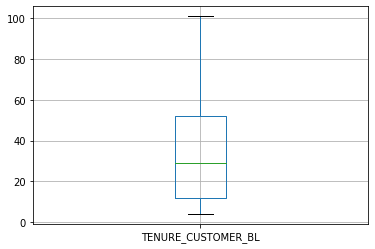

In [64]:
datadef.boxplot(['TENURE_CUSTOMER_BL']) #Graficamos un Boxplot de la Columna, como podemos ver, no se visualizan Outliers

-------------------------------------------------------------------------------------------------
#### Analizamos de manera Paralela las Columnas de "Cantidad de Recargas Acumuladas Mensuales"

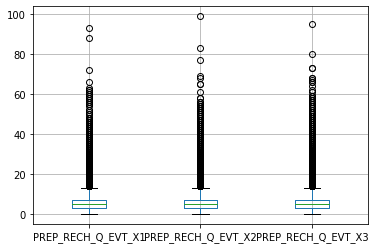

In [65]:
datadef.boxplot(['PREP_RECH_Q_EVT_X1','PREP_RECH_Q_EVT_X2','PREP_RECH_Q_EVT_X3']) #Graficamos un Boxplot por cada Columna

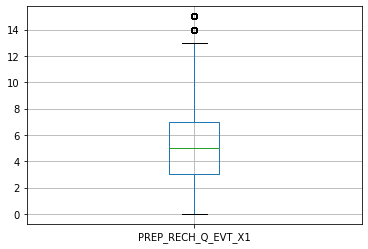

In [66]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_Q_EVT_X1'
datadef[datadef['PREP_RECH_Q_EVT_X1']<=datadef['PREP_RECH_Q_EVT_X1'].quantile(0.99)].boxplot('PREP_RECH_Q_EVT_X1')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_Q_EVT_X1']>datadef['PREP_RECH_Q_EVT_X1'].quantile(0.95),'PREP_RECH_Q_EVT_X1'] = datadef['PREP_RECH_Q_EVT_X1'].quantile(0.95)

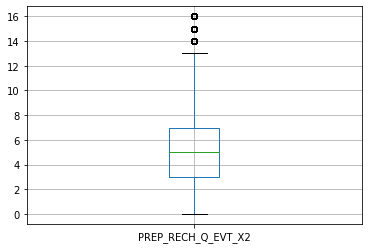

In [67]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_Q_EVT_X2'
datadef[datadef['PREP_RECH_Q_EVT_X2']<=datadef['PREP_RECH_Q_EVT_X2'].quantile(0.99)].boxplot('PREP_RECH_Q_EVT_X2')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_Q_EVT_X2']>datadef['PREP_RECH_Q_EVT_X2'].quantile(0.95),'PREP_RECH_Q_EVT_X2'] = datadef['PREP_RECH_Q_EVT_X2'].quantile(0.95)

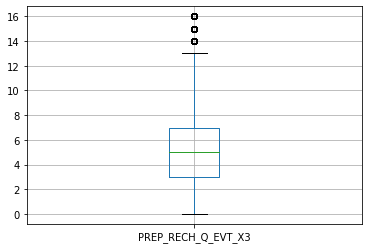

In [68]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_Q_EVT_X3'
datadef[datadef['PREP_RECH_Q_EVT_X3']<=datadef['PREP_RECH_Q_EVT_X3'].quantile(0.99)].boxplot('PREP_RECH_Q_EVT_X3')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_Q_EVT_X3']>datadef['PREP_RECH_Q_EVT_X3'].quantile(0.95),'PREP_RECH_Q_EVT_X3'] = datadef['PREP_RECH_Q_EVT_X3'].quantile(0.95)

-------------------------------------------------------------------------------------------------
#### Analizamos de manera Paralela las Columnas de "Monto de Recargas Acumuladas Mensuales"

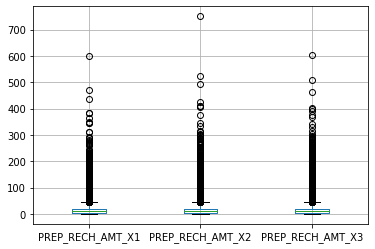

In [69]:
datadef.boxplot(['PREP_RECH_AMT_X1','PREP_RECH_AMT_X2','PREP_RECH_AMT_X3']) #Graficamos un Boxplot por cada Columna

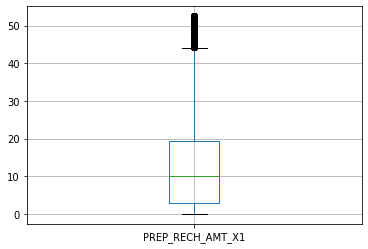

In [70]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_AMT_X1'
datadef[datadef['PREP_RECH_AMT_X1']<=datadef['PREP_RECH_AMT_X1'].quantile(0.99)].boxplot('PREP_RECH_AMT_X1')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_AMT_X1']>datadef['PREP_RECH_AMT_X1'].quantile(0.95),'PREP_RECH_AMT_X1'] = datadef['PREP_RECH_AMT_X1'].quantile(0.95)

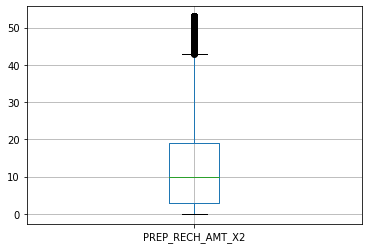

In [71]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_AMT_X2'
datadef[datadef['PREP_RECH_AMT_X2']<=datadef['PREP_RECH_AMT_X2'].quantile(0.99)].boxplot('PREP_RECH_AMT_X2')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_AMT_X2']>datadef['PREP_RECH_AMT_X2'].quantile(0.95),'PREP_RECH_AMT_X2'] = datadef['PREP_RECH_AMT_X2'].quantile(0.95)

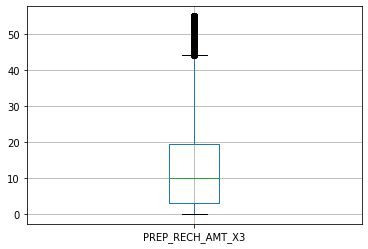

In [72]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_AMT_X3'
datadef[datadef['PREP_RECH_AMT_X3']<=datadef['PREP_RECH_AMT_X3'].quantile(0.99)].boxplot('PREP_RECH_AMT_X3')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_AMT_X3']>datadef['PREP_RECH_AMT_X3'].quantile(0.95),'PREP_RECH_AMT_X3'] = datadef['PREP_RECH_AMT_X3'].quantile(0.95)

-----------------------------------------------------------------------------------------------------
#### Analizamos la Columna de "Días desde la Última Recarga"

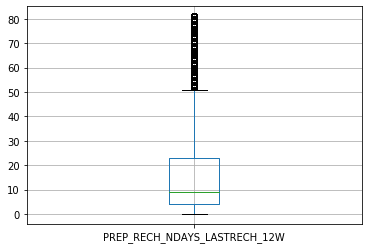

In [73]:
#Graficamos un Boxplot de la Columna 'PREP_RECH_NDAYS_LASTRECH_12W'
datadef[datadef['PREP_RECH_NDAYS_LASTRECH_12W']<=datadef['PREP_RECH_NDAYS_LASTRECH_12W'].quantile(0.99)].boxplot('PREP_RECH_NDAYS_LASTRECH_12W')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['PREP_RECH_NDAYS_LASTRECH_12W']>datadef['PREP_RECH_NDAYS_LASTRECH_12W'].quantile(0.95),'PREP_RECH_NDAYS_LASTRECH_12W'] = datadef['PREP_RECH_NDAYS_LASTRECH_12W'].quantile(0.95)

-------------------------------------------------------------------------------------------------
#### Analizamos de manera Paralela las Columnas de "Tráfico de Datos Mensual"

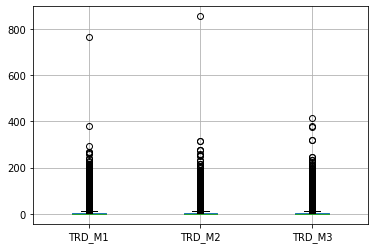

In [74]:
datadef.boxplot(['TRD_M1','TRD_M2','TRD_M3']) #Graficamos un Boxplot por cada Columna

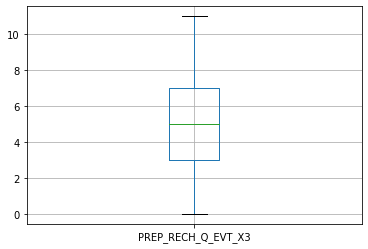

In [75]:
#Graficamos un Boxplot de la Columna 'TRD_M1'
datadef[datadef['TRD_M1']<=datadef['TRD_M1'].quantile(0.99)].boxplot('PREP_RECH_Q_EVT_X3')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['TRD_M1']>datadef['TRD_M1'].quantile(0.95),'PREP_RECH_Q_EVT_X3'] = datadef['PREP_RECH_Q_EVT_X3'].quantile(0.95)

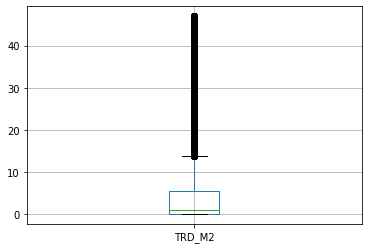

In [76]:
#Graficamos un Boxplot de la Columna 'TRD_M2'
datadef[datadef['TRD_M2']<=datadef['TRD_M2'].quantile(0.99)].boxplot('TRD_M2')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['TRD_M2']>datadef['TRD_M2'].quantile(0.95),'TRD_M2'] = datadef['TRD_M2'].quantile(0.95)

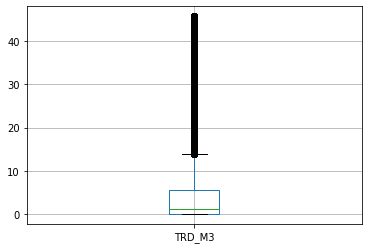

In [77]:
#Graficamos un Boxplot de la Columna 'TRD_M2'
datadef[datadef['TRD_M3']<=datadef['TRD_M3'].quantile(0.99)].boxplot('TRD_M3')
#Eliminamos los Outliers que se encuentran fuera del Percentil 0.95
datadef.loc[datadef['TRD_M3']>datadef['TRD_M3'].quantile(0.95),'TRD_M3'] = datadef['TRD_M3'].quantile(0.95)

----------------------------------------------------------------------------------------------------------------
### Transformaciones / Dummification
Lo que hacemos a continuación, es crear columnas independientes entre si, de las subcategorias mas importantes dentro de "NETWORK_TECH", "SEGMENTATION", "DEVICE_VENDOR_NAME" y "VALUE_SEGMENT". El objetivo con esto, es lograr que esas columnas pasen de alojar valores categóricos, a otorgar los mismos para formar nuevas columnas, las cuales en su contenido marcarán si cada usuario fila a fila cumple con ese requerimiento en formato de 1-0 (lo que equivale a: SI-NO o True-false).

#### Tratamiento de las columnas de "NETWORK_TECH", "SEGMENTATION" y "VALUE_SEGMENT"

In [17]:
#DUMMIFICATION EN COLUMNA 'NETWORK_TECH'
datadef1 = pd.get_dummies(datadef['NETWORK_TECH'], prefix='NT') #Creamos columnas con las subcategorias de 'NETWORK_TECH' y guardamos en nuevo dataframe
datadef = pd.concat([datadef, datadef1], axis=1)                #Concatenamos los dos dataframes
del datadef1                                                    #Eliminamos el dataframe transitorio para liberar memoria RAM

In [18]:
#DUMMIFICATION EN COLUMNA 'SEGMENTATION'
datadef2 = pd.get_dummies(datadef['SEGMENTATION'], prefix='SEGMENT') #Creamos columnas con las subcategorias de 'SEGMENTATION' y guardamos en nuevo dataframe
datadef = pd.concat([datadef, datadef2], axis=1)                     #Concatenamos los dos dataframes
del datadef2                                                         #Eliminamos el dataframe transitorio para liberar memoria RAM

MemoryError: 

In [ ]:
#DUMMIFICATION EN COLUMNA 'VALUE_SEGMENT'
datadef3 = pd.get_dummies(datadef['VALUE_SEGMENT'], prefix='VAL_SEG') #Creamos columnas con las subcategorias de 'NETWORK_TECH' y guardamos en nuevo dataframe
datadef = pd.concat([datadef, datadef3], axis=1)                 #Concatenamos los dos dataframes
del datadef3                                                     #Eliminamos el dataframe transitorio para liberar memoria RAM

#### Tratamiento de la columna de "DEVICE_VENDOR_NAME"

In [ ]:
#Creamos un Array con las Marcas que NO queremos remplazar por "OTHERS"
marcas =['SAMSUNG','LG','HUAWEI','NOT_IDENTIFIED']

#Decimos que todas las marcas de la Columna "DEVICE_VENDOR_NAME" que no aparecen en el Array(marcas) sea remplazadas por el string "OTHERS"
datadef.loc[~datadef["DEVICE_VENDOR_NAME"].isin(marcas), "DEVICE_VENDOR_NAME"] = "OTHERS"

In [ ]:
#DUMMIFICATION EN COLUMNA 'DEVICE_VENDOR_NAME'
datadef4 = pd.get_dummies(datadef['DEVICE_VENDOR_NAME'], prefix='DEVICE') #Creamos columnas con las subcategorias de 'DEVICE_VENDOR_NAME' y guardamos en nuevo dataframe
datadef = pd.concat([datadef, datadef4], axis=1)                          #Concatenamos los dos dataframes
del datadef4                                                              #Eliminamos el dataframe transitorio para liberar memoria RAM

Ahora terminamos de hacer ajustes de Disposición de las columnas y Control.

In [ ]:
mid = datadef['TARGET'] #Metemos la Columna 'TARGET' dentro de la variable 'mid'
datadef.drop(labels=['TARGET'], axis=1,inplace = True) #Eliminamos la columna del 'TARGET' del DataFrame
datadef["TARGET"] = mid #Volvemos crear la columna en el DataFrame, y se posiciona de manera predeterminada nuevamenmte al Final

datadef.head() #Chequeamos que se hayan creado y ordenado las columnas pertinentes

Actualizamos el Archivo datadef, pisando el anterior con los datos  nuevos

In [84]:
datadef.to_csv('Dataset/datadef.csv', index = False) #Lo creamos en formato CSV, y lo guardamos en carpeta Dataset

In [2]:
datadef = pd.read_csv('Dataset/datadef.csv') #Leemos el Dataframe creado anteriormente

In [86]:
datadef

,SUSCRIBER_KEY,VALUE_SEGMENT,SEGMENTATION,MICROSEGMENTATION,DEVICE_VENDOR_NAME,NETWORK_TECH,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,PREP_RECH_NDAYS_LASTRECH_12W,PREP_RECH_CHNNL_MODE12W,TRD_M1,TRD_M2,TRD_M3,TRS_ONNET_SMS_MEAN,TRS_OFFNET_SMS_MEAN,TRV_ONNET_DUR_MEAN,TRV_OFFNET_DUR_MEAN,TRV_LCL_DUR_MEAN,TRV_INTRNTL_DUR_MEAN,TRS_ONNET_SMS_STD,TRS_OFFNET_SMS_STD,TRV_ONNET_DUR_STD,TRV_OFFNET_DUR_STD,TRV_LCL_DUR_STD,TRV_INTRNTL_DUR_STD,PACK_DATA_Q_MEAN,PACK_VOICE_Q_MEAN,PACK_SMS_Q_MEAN,PACK_DATA_AMT_MEAN,PACK_VOICE_AMT_MEAN,PACK_SMS_AMT_MEAN,PACK_DATA_Q_STD,PACK_VOICE_Q_STD,PACK_SMS_Q_STD,PACK_DATA_AMT_STD,PACK_VOICE_AMT_STD,PACK_SMS_AMT_STD,NT_2G,NT_3G,NT_LTE,SEGMENT_1-HCV,SEGMENT_2-PD,SEGMENT_3-DO,SEGMENT_4-VD,SEGMENT_5-PV,SEGMENT_6-OH,SEGMENT_7-LOW,VAL_SEG_1 - PLATINUM,VAL_SEG_2 - GOLD,VAL_SEG_3 - SILVER,VAL_SEG_4 - BRONZE,DEVICE_HUAWEI,DEVICE_LG,DEVICE_NOT_IDENTIFIED,DEVICE_OTHERS,DEVICE_SAMSUNG,TARGET
0,E_67773005_20190427,2 - GOLD,3-DO,VD3,NOT_IDENTIFIED,LTE,6,4.0,5.0,6.0,6.0,9.0,17.0,6.0,"N/A,1;UGW,8",1.25,4.94,3.05,0.0,0.000000,231.300000,1.173333,232.473333,0.0,0.0,0.000000,158.766121,0.922906,158.991224,0.0,6.333333,0.000000,0.0,8.663333,0.000000,0.0,0.471405,0.000000,0.0,3.174380,0.000000,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,E_65364767_20150701,1 - PLATINUM,1-HCV,HCV1,SAMSUNG,LTE,52,8.0,8.0,7.0,24.0,22.0,25.0,5.0,"UGW,17",6.61,6.69,6.71,0.0,0.000000,469.436667,10.633333,480.073333,0.0,0.0,0.000000,105.314420,4.826954,110.105147,0.0,7.666667,0.000000,0.0,22.980000,0.000000,0.0,0.471405,0.000000,0.0,1.414214,0.000000,0.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,E_67094312_20150701,3 - SILVER,5-PV,PV1,SAMSUNG,3G,52,0.0,5.0,3.0,0.0,13.0,3.0,32.0,"UGW,4",0.00,0.04,0.00,0.0,3.666667,221.830000,1.520000,223.350000,0.0,0.0,0.942809,52.089239,1.124366,52.714109,0.0,0.000000,7.333333,0.0,0.000000,10.613333,0.0,0.000000,1.247219,0.0,0.000000,2.481966,0.0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,E_66513730_20150701,2 - GOLD,3-DO,DO4,SAMSUNG,LTE,52,8.0,6.0,7.0,16.0,14.0,10.0,0.0,"UGW,15",2.37,2.23,2.62,0.0,8.333333,3.513333,14.206667,17.720000,0.0,0.0,1.699673,3.139016,17.651849,15.280761,0.0,7.000000,0.000000,0.0,7.500000,0.000000,0.0,0.816497,0.000000,0.0,1.224745,0.000000,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,E_67337458_20181130,3 - SILVER,7-LOW,OH1,SAMSUNG,LTE,11,3.0,3.0,0.0,10.0,15.0,0.0,5.0,"UGW,2",0.02,0.00,0.01,0.0,4.333333,1.360000,0.266667,1.626667,0.0,0.0,0.471405,1.783779,0.377124,2.160576,0.0,2.000000,0.000000,0.0,3.993333,0.000000,0.0,1.414214,0.000000,0.0,3.738095,0.000000,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965128,E_65368083_20171114,3 - SILVER,2-PD,PD1,SAMSUNG,LTE,23,4.0,4.0,0.0,6.0,10.0,0.0,17.0,"UGW,4",8.12,10.00,0.00,0.0,0.000000,6.020000,2.493333,8.516667,0.0,0.0,0.000000,4.855808,2.784736,7.642741,0.0,3.333333,0.000000,0.0,5.293333,0.000000,0.0,2.494438,0.000000,0.0,4.103505,0.000000,0.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
965129,E_69679676_20160601,3 - SILVER,7-LOW,OH4,HUAWEI,3G,41,0.0,5.0,3.0,0.0,8.0,3.0,31.0,"N/A,1;UGW,3",0.45,0.00,1.01,0.0,2.333333,0.583333,0.000000,0.583333,0.0,0.0,1.699673,0.824958,0.000000,0.824958,0.0,2.333333,0.000000,0.0,2.663333,0.000000,0.0,1.699673,0.000000,0.0,2.051021,0.000000,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
965130,E_67439490_20150602,3 - SILVER,6-OH,LOW4,HUAWEI,LTE,53,6.0,4.0,3.0,9.0,4.5,1.5,11.0,"N/A,4;UGW,3",0.84,0.65,0.17,0.0,0.000000,35.796667,0.373333,36.170000,0.0,0.0,0.000000,29.910267,0.527973,30.389801,0.0,4.000000,3.000000,0.0,3.446667,2.653333,0.0,1.414214,2.160247,0.0,1.430719,1.876190,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
965131,E_66532813_20190520,3 - SILVER,6-OH,OH3,OTHERS,LTE,5,4.0,4.0,

# -----------------------------------------------------------------------------------------------------------
# ETAPA 5: Análisis Exploratorio

### Correlación de Variables
En esta etapa veremos los coeficientes de correlación entre las diferentes variables entendiendo resultados de o a 1 como relacion directa positiva y menor a cero como relacion directa negativa.

----------------------------------------------------------
#### Análisis del Dataset Completo
Primero buscaremos Coeficientes de Relación Altos comparando todas las columnas con valores Numéricos entre sí

In [ ]:
#Creamos un dataset con las columnas que queremos analizar en primer lugar, y le aplicamos la función "corr()"
analisis1 = datadef[['TENURE_CUSTOMER_BL', 'PREP_RECH_AMT_X3', 'PREP_RECH_Q_EVT_X3', 'TRD_M3', 'PREP_RECH_NDAYS_LASTRECH_12W',
                     'TRS_ONNET_SMS_MEAN','TRS_OFFNET_SMS_MEAN','TRV_ONNET_DUR_MEAN','TRV_OFFNET_DUR_MEAN','TRV_LCL_DUR_MEAN',
                     'TRV_INTRNTL_DUR_MEAN','TRS_ONNET_SMS_STD' ,'TRS_OFFNET_SMS_STD', 'TRV_ONNET_DUR_STD', 'TRV_OFFNET_DUR_STD', 
                     'TRV_LCL_DUR_STD', 'TRV_INTRNTL_DUR_STD', 'PACK_DATA_Q_MEAN', 'PACK_VOICE_Q_MEAN', 'PACK_SMS_Q_MEAN', 
                     'PACK_DATA_AMT_MEAN', 'PACK_VOICE_AMT_MEAN', 'PACK_SMS_AMT_MEAN', 'PACK_DATA_Q_STD', 'PACK_VOICE_Q_STD', 
                     'PACK_SMS_Q_STD', 'PACK_DATA_AMT_STD', 'PACK_VOICE_AMT_STD', 'PACK_SMS_AMT_STD', 'TARGET']].corr()

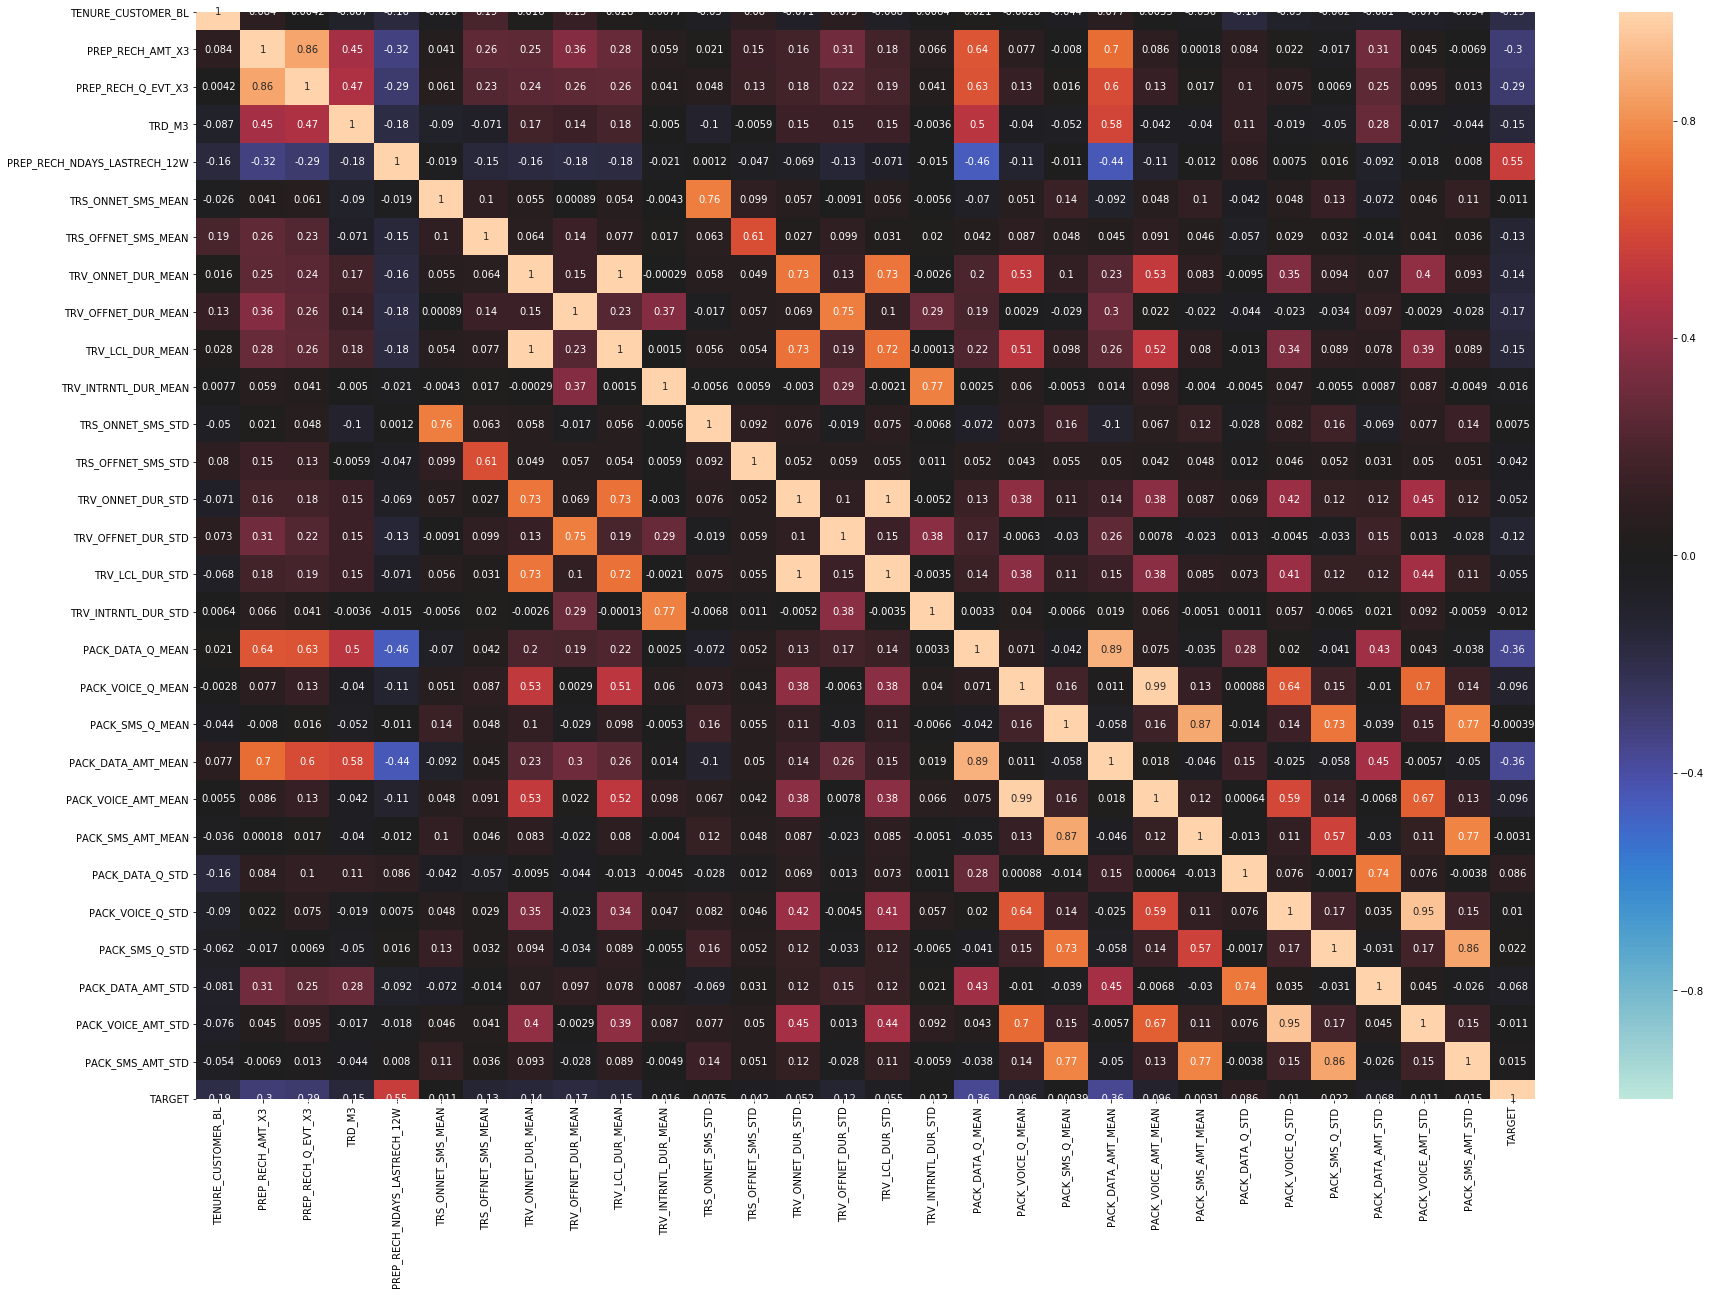

In [88]:
#Predefinimos las Dimensiones del Gráfico
plt.figure(figsize=(30,20))
#Graficamos un Mapa de Calor respecto a los Coeficientes de Correlación.
sns.heatmap(analisis1, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = analisis1.columns, 
            yticklabels = analisis1.columns);

del analisis1

------------------------------------
#### Análisis del Dataset Completo
Ahora buscaremos Coeficientes de Relación Altos comparando todas las columnas que son producto del Proceso de Dummification

In [103]:
#Creamos un dataset con las columnas que queremos analizar en segundo lugar, y le aplicamos la función "corr()"
analisis2 = datadef[['NT_2G', 'NT_3G', 'NT_LTE', 'SEGMENT_1-HCV', 'SEGMENT_2-PD',
                     'SEGMENT_3-DO','SEGMENT_4-VD','SEGMENT_5-PV','SEGMENT_6-OH',
                     'SEGMENT_7-LOW','DEVICE_HUAWEI' ,'DEVICE_LG', 'DEVICE_NOT_IDENTIFIED', 'DEVICE_OTHERS', 
                     'DEVICE_SAMSUNG','VAL_SEG_1 - PLATINUM','VAL_SEG_2 - GOLD',
                     'VAL_SEG_3 - SILVER','VAL_SEG_4 - BRONZE', 'TARGET']].corr()

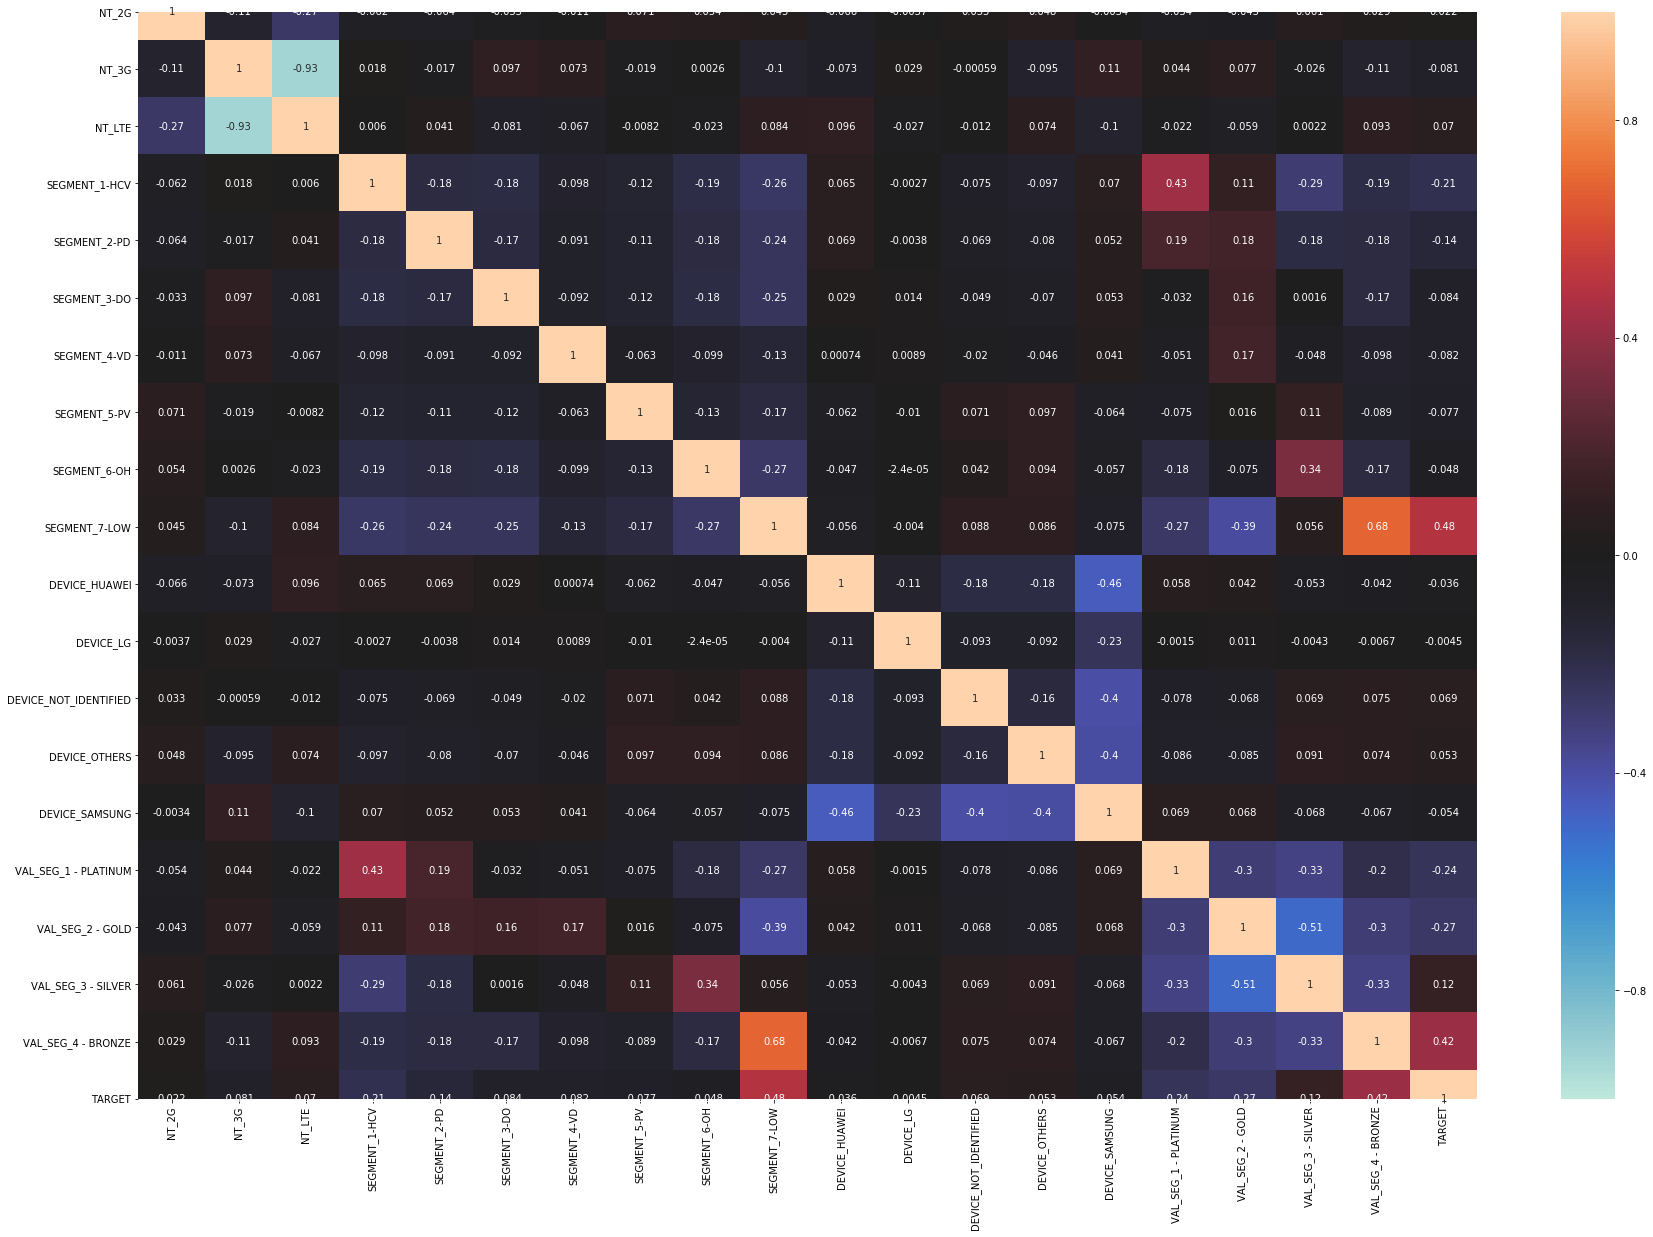

In [104]:
#Predefinimos las Dimensiones del Gráfico
plt.figure(figsize=(30,20))
#Graficamos un Mapa de Calor respecto a los Coeficientes de Correlación.
sns.heatmap(analisis2, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = analisis2.columns, 
            yticklabels = analisis2.columns);

del analisis2

---------------------------------------
#### Visualización General de los dos Primeros Gráficos:
En el primer Gráfico, se puede observar que existen Correlaciones interesantes entre distintas columnas, y otras que nos hacen ver la poca utilidad de contar con algunas de ellas, a continuación se enumerarán sus casos.
En cuanto al segundo Gráfico, no encontramos correlaciones significativas por lo que no existen datos claves entre sí.

-----------------------------------------------
Primer Grupo de Columnas con altos Coeficientes de Correlación

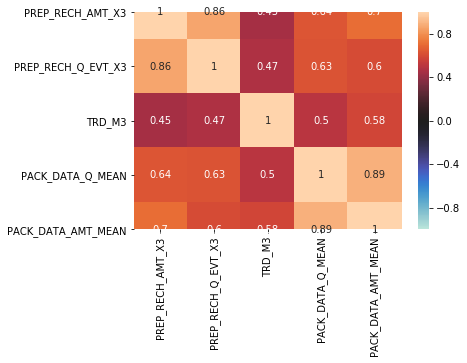

In [8]:
PRIMER_GRUPO = datadef[['PREP_RECH_AMT_X3', 'PREP_RECH_Q_EVT_X3', 'TRD_M3', 'PACK_DATA_Q_MEAN',
                     'PACK_DATA_AMT_MEAN']].corr()

sns.heatmap(PRIMER_GRUPO , annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = PRIMER_GRUPO .columns, 
            yticklabels = PRIMER_GRUPO .columns);

del PRIMER_GRUPO 

-----------------------------------------------------------------------------------------
Segundo Grupo de Columnas con altos Coeficientes de Correlación

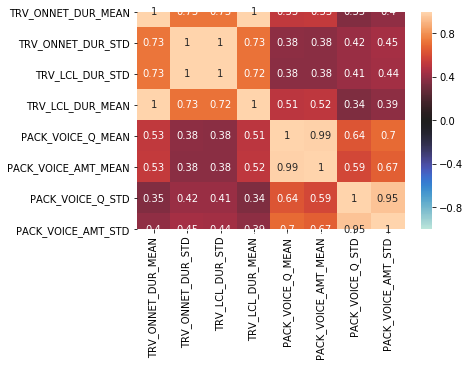

In [14]:
TERCER_GRUPO = datadef[['TRV_ONNET_DUR_MEAN', 'TRV_ONNET_DUR_STD', 'TRV_LCL_DUR_STD', 'TRV_LCL_DUR_MEAN', 
                        'PACK_VOICE_Q_MEAN', 'PACK_VOICE_AMT_MEAN', 'PACK_VOICE_Q_STD', 'PACK_VOICE_AMT_STD' ]].corr()

sns.heatmap(TERCER_GRUPO, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = TERCER_GRUPO.columns, 
            yticklabels = TERCER_GRUPO.columns);

del TERCER_GRUPO

-----------------------------------------------------
Tercer Grupo de Columnas con altos Coeficientes de Correlación

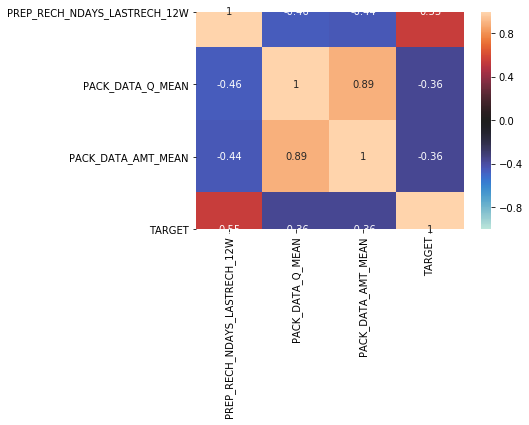

In [17]:
SEGUNDO_GRUPO  = datadef[['PREP_RECH_NDAYS_LASTRECH_12W', 'PACK_DATA_Q_MEAN',
                     'PACK_DATA_AMT_MEAN', 'TARGET']].corr()

sns.heatmap(SEGUNDO_GRUPO, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = SEGUNDO_GRUPO.columns, 
            yticklabels = SEGUNDO_GRUPO.columns);

del SEGUNDO_GRUPO

----------------------------------------------
Cuarto Grupo de Columnas con altos Coeficientes de Correlación

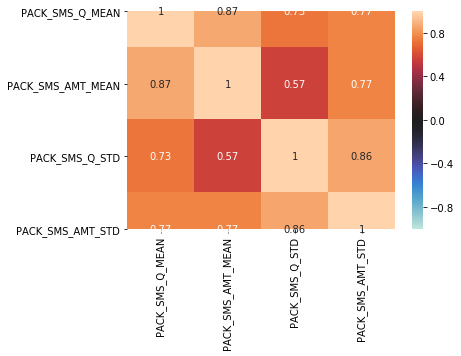

In [18]:
CUARTO_GRUPO = datadef[['PACK_SMS_Q_MEAN', 'PACK_SMS_AMT_MEAN', 'PACK_SMS_Q_STD',
                     'PACK_SMS_AMT_STD']].corr()

sns.heatmap(CUARTO_GRUPO, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = CUARTO_GRUPO.columns, 
            yticklabels = CUARTO_GRUPO.columns);

del CUARTO_GRUPO

----------------------------------------
Quinto Grupo de Columnas con algunos Coeficientes de Correlación altos

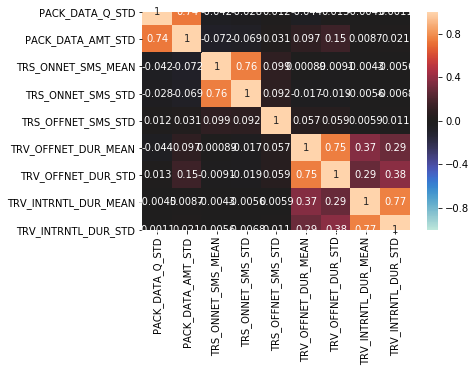

In [20]:
QUINTO_GRUPO = datadef[['PACK_DATA_Q_STD', 'PACK_DATA_AMT_STD', 'TRS_ONNET_SMS_MEAN',
                     'TRS_ONNET_SMS_STD', 'TRS_OFFNET_SMS_STD', 'TRV_OFFNET_DUR_MEAN', 'TRV_OFFNET_DUR_STD',
                     'TRV_INTRNTL_DUR_MEAN', 'TRV_INTRNTL_DUR_STD']].corr()

sns.heatmap(QUINTO_GRUPO, annot = True, vmin=-1, vmax=1, center= 0, 
            xticklabels = QUINTO_GRUPO.columns, 
            yticklabels = QUINTO_GRUPO.columns);

del QUINTO_GRUPO

### Analizamos otras Variables en conjunto con el TARGET

In [91]:
analisis1 = (datadef[['TENURE_CUSTOMER_BL', 'PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2', 
                       'PREP_RECH_Q_EVT_X3', 'TARGET']].corr())
#Mostramos el dataframe
analisis1

,TENURE_CUSTOMER_BL,PREP_RECH_Q_EVT_X1,PREP_RECH_Q_EVT_X2,PREP_RECH_Q_EVT_X3,TARGET
TENURE_CUSTOMER_BL,1.000000,0.120894,0.077707,0.004246,-0.188382
PREP_RECH_Q_EVT_X1,0.120894,1.000000,0.658027,0.527511,-0.523008
PREP_RECH_Q_EVT_X2,0.077707,0.658027,1.000000,0.616965,-0.394318
PREP_RECH_Q_EVT_X3,0.004246,0.527511,0.616965,1.000000,-0.286509
TARGET,-0.188382,-0.523008,-0.394318,-0.286509,1.000000


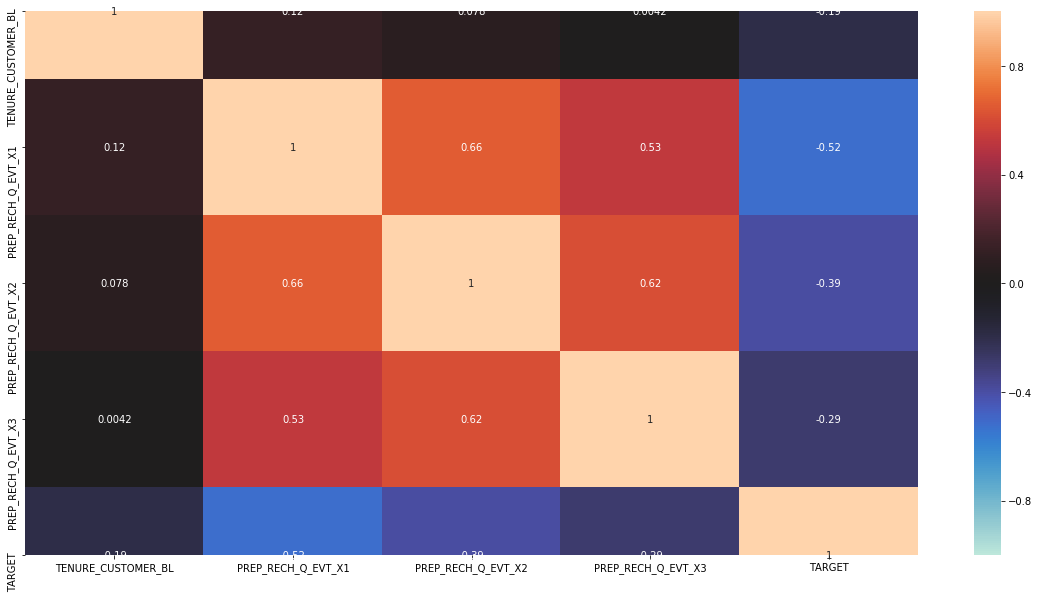

In [92]:
#Correlacion entre antiguedad desde primer carga y cantidad de cargas
plt.figure(figsize=(20,10))
#Plot the heatmap
sns.heatmap(analisis1, 
        annot = True, vmin=-1, vmax=1, center= 0,
        xticklabels=analisis1.columns,
        yticklabels=analisis1.columns);

In [93]:
#Correlacion entre antiguedad desde primer carga y monto de carga
analisis2 = datadef[['TENURE_CUSTOMER_BL', 'PREP_RECH_AMT_X1', 'PREP_RECH_AMT_X2', 'PREP_RECH_AMT_X3', 'TARGET']].corr()

#Mostramos el dataframe
analisis2

,TENURE_CUSTOMER_BL,PREP_RECH_AMT_X1,PREP_RECH_AMT_X2,PREP_RECH_AMT_X3,TARGET
TENURE_CUSTOMER_BL,1.000000,0.161437,0.128715,0.084311,-0.188382
PREP_RECH_AMT_X1,0.161437,1.000000,0.733400,0.631805,-0.496562
PREP_RECH_AMT_X2,0.128715,0.733400,1.000000,0.704893,-0.395879
PREP_RECH_AMT_X3,0.084311,0.631805,0.704893,1.000000,-0.302416
TARGET,-0.188382,-0.496562,-0.395879,-0.302416,1.000000


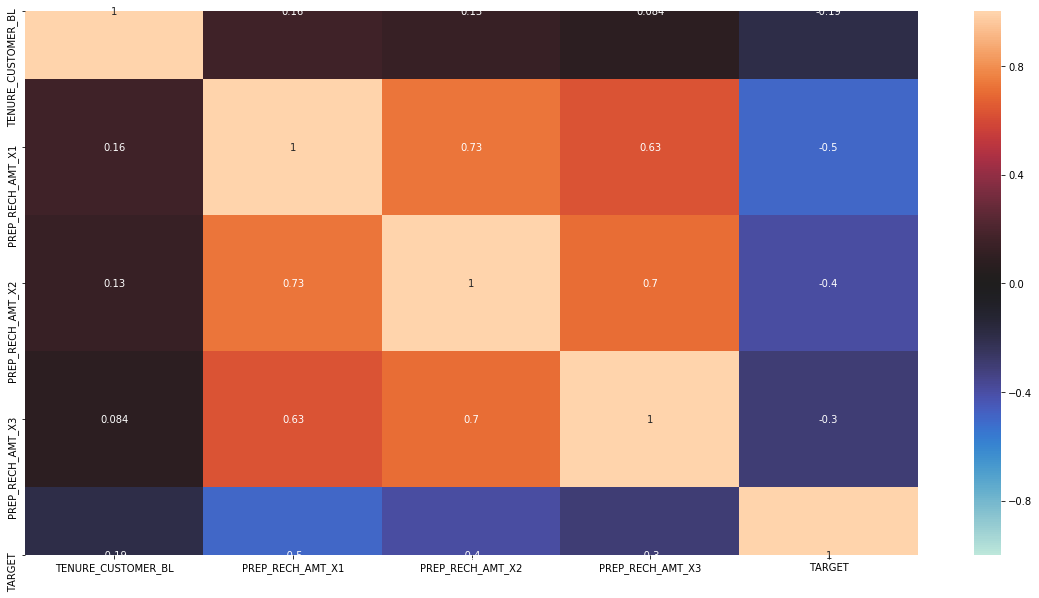

In [94]:
plt.figure(figsize=(20,10))
#Plot the heatmap
sns.heatmap(analisis2, 
        annot = True, vmin=-1, vmax=1, center= 0,
        xticklabels=analisis2.columns,
        yticklabels=analisis2.columns);

In [95]:
#Creamos una variable donde guardamos un dataframe con las correlaciones de cada columna entre sí
analisis3 = datadef[[ 'TRD_M1', 'TRD_M2', 'TRD_M3', 'TARGET']].corr()

#Mostramos el dataframe
analisis3

,TRD_M1,TRD_M2,TRD_M3,TARGET
TRD_M1,1.000000,0.756355,0.669867,-0.219219
TRD_M2,0.756355,1.000000,0.829671,-0.190370
TRD_M3,0.669867,0.829671,1.000000,-0.153880
TARGET,-0.219219,-0.190370,-0.153880,1.000000


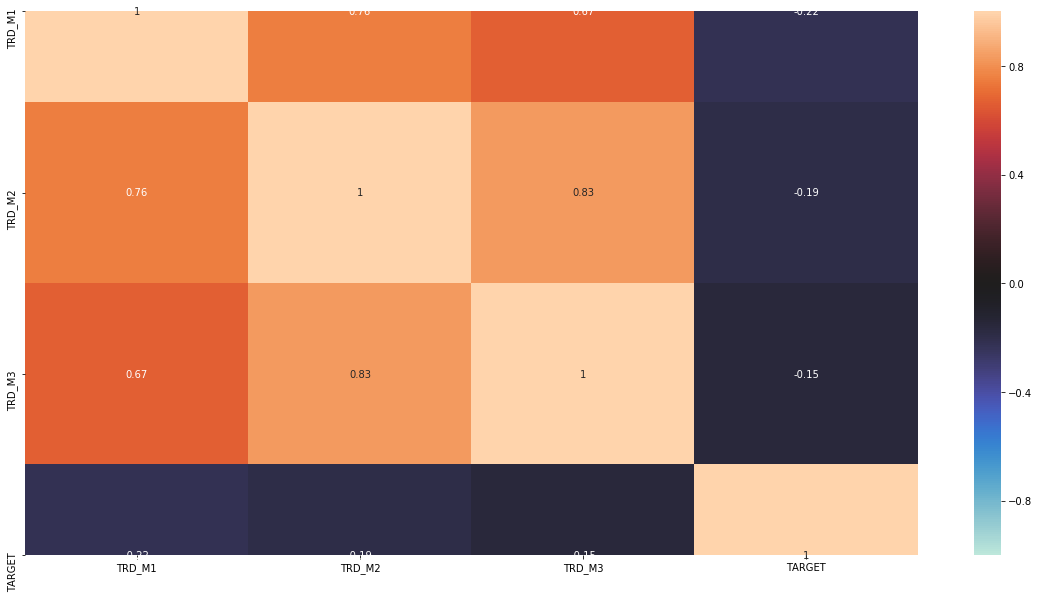

In [96]:
#Relación del Tráfico con target
plt.figure(figsize=(20,10))
#Plot the heatmap
sns.heatmap(analisis3, 
        annot = True, vmin=-1, vmax=1, center= 0,
        xticklabels=analisis3.columns,
        yticklabels=analisis3.columns);

------------------------------------------------------------------------------------------------------------
### Relación entre Variables y Distribución

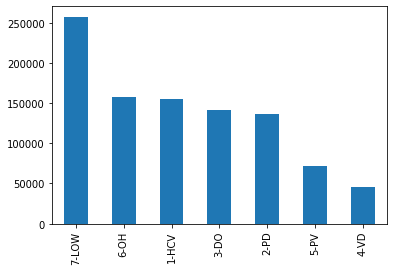

In [21]:
#Aquí vemos la distribución de la Segmentación del cliente útil para conocer su concentración
datadef['SEGMENTATION'].value_counts().plot.bar()

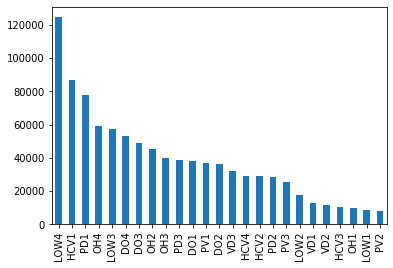

In [97]:
#Aquí vemos la distribución de la Microsegmentación del cliente útil para conocer su concentración
datadef['MICROSEGMENTATION'].value_counts().plot.bar()

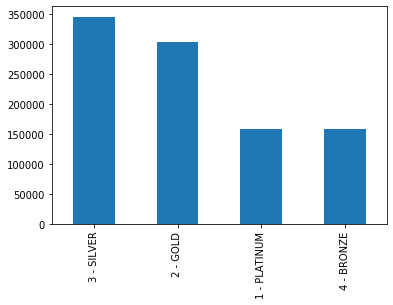

In [22]:
#Aquí vemos la distribución del Segmento de Valor del cliente útil para conocer su concentración
datadef['VALUE_SEGMENT'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE48506A88>]],
      dtype=object)

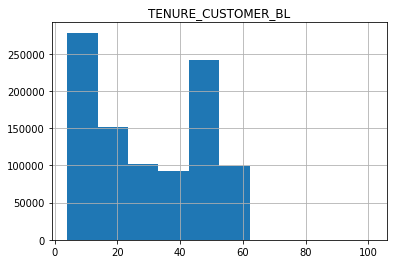

In [98]:
#la antiguedad desde el primer recargo se consentra en mayor proporcion en los primeros 40 
datadef.hist(column='TENURE_CUSTOMER_BL')

In [24]:
#Distribución que permite ver como fue el consumo de recarga y distribucion segun segmento de valor para cada segmentacion
pd.pivot_table(datadef, index=['SEGMENTATION'],
                        columns=['VALUE_SEGMENT'],
                        values=['PREP_RECH_AMT_X1', 'PREP_RECH_AMT_X2', 'PREP_RECH_AMT_X3'],
                        aggfunc={'PREP_RECH_AMT_X1': 'mean', 'PREP_RECH_AMT_X2':'mean', 'PREP_RECH_AMT_X3': 'mean'}, # diccionario con funciones especificas para cada columna
                        fill_value=0,
                        margins=True)

PREP_RECH_AMT_X1                                              \
VALUE_SEGMENT     1 - PLATINUM   2 - GOLD 3 - SILVER 4 - BRONZE        All   
SEGMENTATION                                                                 
1-HCV                25.900067  18.592557  10.063321   0.924242  22.151253   
2-PD                 24.456803  16.238130   8.271441   0.853556  17.857202   
3-DO                 23.943540  14.749804   7.392538   0.905026  13.218375   
4-VD                 19.147517  14.601104   8.914204   1.013158  13.491456   
5-PV                 29.560923  19.601066   9.005958   0.842863  13.579132   
6-OH                 24.649886  15.213194   8.130185   0.877280   9.960971   
7-LOW                 1.690191   2.575613   2.559840   0.730128   1.495549   
All                  25.153102  16.210517   6.518162   0.736962  11.685360   

              PREP_RECH_AMT_X2                                              \
VALUE_SEGMENT     1 - PLATINUM   2 - GOLD 3 - SILVER 4 - BRONZE        All   
SEGMENTATION                                                                 
1-HCV                25.584039  17.847773   8.925565   5.303030  21.620603   
2-PD                 24.305366  15.878358   7.298890   5.658075  17.490171   
3-DO                 24.495616  14.322053   6.968218   5.405150  12.972854   
4-VD                 21.532053  14.737016   8.961101   6.262237  13.793275   
5-PV                 29.794368  19.365556   8.489396   3.049400  13.336504   
6-OH                 26.018807  15.185990   6.847737   6.043605   9.130937   
7-LOW                18.597452  10.942545   3.758173   1.686315   2.675969   
All                  25.114366  15.967937   6.256660   1.831842  11.687874   

              PREP_RECH_AMT_X3                                              
VALUE_SEGMENT     1 - PLATINUM   2 - GOLD 3 - SILVER 4 - BRONZE        All  
SEGMENTATION                                                                
1-HCV                24.983363  15.629460   5.026929   0.893939  20.198207  
2-PD                 24.125897  14.787324   4.895551   1.343096  16.515468  
3-DO                 24.936032  14.500747   5.862178   1.752538  12.687708  
4-VD                 23.668822  14.590575   7.263925   1.545132  13.426419  
5-PV                 29.898750  18.951547   7.638615   3.333390  12.750986  
6-OH                 27.402180  16.626827   6.467190   1.319746   9.135996  
7-LOW                31.958599  22.650418   7.182188   4.263804   5.744723  
All                  24.893466  15.552474   6.640357   4.164913  12.039172

In [25]:
#Distribución que permite ver como fue el consumo de recarga y distribucion segun segmento de valor para cada segmentacion
pd.pivot_table(datadef, index=['SEGMENTATION'],
                        columns=['VALUE_SEGMENT'],
                        values=['PREP_RECH_Q_EVT_X1', 'PREP_RECH_Q_EVT_X2', 'PREP_RECH_Q_EVT_X3'],
                        aggfunc={'PREP_RECH_Q_EVT_X1': 'mean', 'PREP_RECH_Q_EVT_X2':'mean', 'PREP_RECH_Q_EVT_X3': 'mean'}, # diccionario con funciones especificas para cada columna
                        fill_value=0,
                        margins=True)

PREP_RECH_Q_EVT_X1                                            \
VALUE_SEGMENT       1 - PLATINUM  2 - GOLD 3 - SILVER 4 - BRONZE       All   
SEGMENTATION                                                                 
1-HCV                   8.441503  6.371399   4.443812   0.757576  7.397678   
2-PD                    8.243092  6.042742   3.981224   0.635983  6.484032   
3-DO                    8.349964  5.700056   3.640780   0.661302  5.270555   
4-VD                    7.571390  5.702872   3.908819   0.763158  5.386521   
5-PV                    9.828311  7.449671   4.728213   0.780834  5.803449   
6-OH                    8.727808  6.170017   4.148210   0.591965  4.642968   
7-LOW                   1.108280  1.962663   2.264685   0.581432  1.280364   
All                     8.391723  6.075875   3.562237   0.586793  4.660771   

              PREP_RECH_Q_EVT_X2                                            \
VALUE_SEGMENT       1 - PLATINUM  2 - GOLD 3 - SILVER 4 - BRONZE       All   
SEGMENTATION                                                                 
1-HCV                   8.408306  6.219357   4.051017   3.060606  7.300277   
2-PD                    8.247189  5.955419   3.573620   3.200837  6.386941   
3-DO                    8.574341  5.631557   3.377620   3.128018  5.196403   
4-VD                    8.156106  5.719436   3.816273   3.315789  5.424958   
5-PV                    9.946520  7.444486   4.494533   2.409938  5.758853   
6-OH                    9.112339  6.190438   3.567227   3.237376  4.275855   
7-LOW                   7.050955  5.212479   2.511841   1.392812  1.906565   
All                     8.432319  6.053642   3.344789   1.465471  4.726073   

              PREP_RECH_Q_EVT_X3                                            
VALUE_SEGMENT       1 - PLATINUM  2 - GOLD 3 - SILVER 4 - BRONZE       All  
SEGMENTATION                                                                
1-HCV                   8.810637  6.487195   3.211996   1.121212  7.597665  
2-PD                    8.930853  6.524391   3.078379   1.142259  6.839589  
3-DO                    8.678553  5.663685   2.893775   1.091441  5.032617  
4-VD                    8.737286  5.705239   3.212243   1.105263  5.304288  
5-PV                    9.967530  7.360370   4.164767   2.441585  5.552882  
6-OH                    9.446409  6.563354   3.356557   0.876520  4.175369  
7-LOW                  10.656051  8.611152   3.690213   2.778600  3.242131  
All                     8.874790  6.335922   3.457114   2.720344  5.132640

In [26]:
#Relación entre segmentacion microsegmentacion y distribucion segun segmento de valor muestra cantidad
pd.pivot_table(datadef, index=['SEGMENTATION', 'MICROSEGMENTATION'],
                        columns=['VALUE_SEGMENT'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30] # vemos los primeros 30 registros

size                               
VALUE_SEGMENT                  1 - PLATINUM 2 - GOLD 3 - SILVER 4 - BRONZE
SEGMENTATION MICROSEGMENTATION                                            
1-HCV        DO1                        2.0      6.0      149.0       16.0
             DO2                        6.0    326.0      748.0        NaN
             DO3                      230.0   1221.0      164.0        NaN
             DO4                     1383.0    923.0       17.0        NaN
             HCV1                   36879.0  26754.0     1748.0        5.0
             HCV2                   15277.0   9349.0      379.0        NaN
             HCV3                    6383.0   3680.0       49.0        NaN
             HCV4                   14980.0   9015.0      162.0        NaN
             OH3                       44.0    146.0       22.0        NaN
             OH4                        NaN     14.0        3.0        NaN
             PD1                     1993.0   2935.0      674.0        1.0
             PD2                     1341.0   1879.0      209.0        2.0
             PD3                     1891.0   1704.0       71.0        NaN
             PV2                      121.0    145.0        3.0        NaN
             PV3                      251.0    397.0       13.0        NaN
             VD1                        3.0    513.0      914.0        9.0
             VD2                      611.0   2311.0       97.0        NaN
             VD3                      960.0   5532.0      380.0        NaN
2-PD         DO1                        NaN     16.0     1662.0      150.0
             DO2                        4.0   1071.0     5440.0       21.0
             DO3                      373.0   4723.0     1115.0        1.0
             DO4                     2209.0   2499.0      147.0        NaN
             HCV1                    3038.0   4014.0      451.0        1.0
             HCV2                      24.0     79.0       18.0        NaN
             HCV3                      35.0     52.0        8.0        NaN
             HCV4                    2048.0   1881.0       93.0        NaN
             PD1                    14566.0  27286.0     7763.0       60.0
             PD2                     8250.0  12299.0     1303.0        3.0
             PD3                    15314.0  16474.0     1097.0        1.0
             VD1                        NaN     17.0       78.0        2.0

In [27]:
#distribucion segun tiempo desde primer recargo en base a la micro segmentacion y valor del segmento 
pd.pivot_table(datadef, index=['VALUE_SEGMENT', 'MICROSEGMENTATION'],
                        columns=['TENURE_CUSTOMER_BL'], # lista de columnas del dataset a utilizar como columnas de la tabla pivot
                        aggfunc=['size'])[:30]

size                                  \
TENURE_CUSTOMER_BL                 4       5       6       7       8     
VALUE_SEGMENT MICROSEGMENTATION                                          
1 - PLATINUM  DO1                  NaN     4.0     3.0     2.0     NaN   
              DO2                  3.0    20.0    10.0     1.0     2.0   
              DO3                 82.0   300.0   113.0   100.0   106.0   
              DO4                 43.0   138.0   264.0   326.0   257.0   
              HCV1               291.0  1109.0  1016.0   971.0   806.0   
              HCV2               134.0   498.0   410.0   445.0   357.0   
              HCV3                35.0   291.0   240.0   244.0   207.0   
              HCV4               143.0   652.0   646.0   656.0   543.0   
              LOW4                 1.0     NaN     NaN     NaN     NaN   
              OH1                  NaN     1.0     1.0     NaN     1.0   
              OH2                  1.0     NaN     1.0     1.0     1.0   
              OH3                  5.0    27.0    20.0    24.0    24.0   
              OH4                  5.0    11.0    12.0    12.0     8.0   
              PD1                168.0   645.0   502.0   469.0   449.0   
              PD2                 85.0   353.0   296.0   276.0   273.0   
              PD3                166.0   725.0   675.0   650.0   584.0   
              PV1                 12.0    36.0    28.0    22.0    30.0   
              PV2                  2.0    13.0    12.0    13.0    13.0   
              PV3                 12.0    38.0    31.0    16.0    34.0   
              VD1                  1.0     5.0     2.0     2.0     NaN   
              VD2                 17.0    39.0    25.0    35.0    30.0   
              VD3                 11.0    52.0    39.0    56.0    38.0   
2 - GOLD      DO1                 29.0   126.0    73.0    67.0    51.0   
              DO2                338.0   902.0   407.0   300.0   273.0   
              DO3                492.0  1263.0  1162.0  1244.0  1100.0   
              DO4                 81.0   178.0   481.0   556.0   486.0   
              HCV1               588.0  1519.0  1431.0  1400.0  1101.0   
              HCV2               175.0   533.0   440.0   492.0   324.0   
              HCV3                59.0   239.0   202.0   201.0   151.0   
              HCV4               179.0   596.0   547.0   546.0   483.0   

                                                                      ...  \
TENURE_CUSTOMER_BL                  9       10     11     12     13   ...   
VALUE_SEGMENT MICROSEGMENTATION                                       ...   
1 - PLATINUM  DO1                   1.0     2.0    2.0    NaN    1.0  ...   
              DO2                   NaN     3.0    4.0    2.0    NaN  ...   
              DO3                  90.0    87.0   70.0   50.0   68.0  ...   
              DO4                 271.0   294.0  241.0  195.0  217.0  ...   
              HCV1                830.0   907.0  702.0  627.0  578.0  ...   
              HCV2                364.0   360.0  266.0  255.0  243.0  ...   
              HCV3                237.0   211.0  167.0  157.0  144.0  ...   
              HCV4                623.0   598.0  400.0  349.0  338.0  ...   
              LOW4                  NaN     NaN    NaN    NaN    NaN  ...   
              OH1                   NaN     NaN    NaN    NaN    NaN  ...   
              OH2                   NaN     1.0    1.0    1.0    NaN  ...   
              OH3                  20.0    10.0   16.0   15.0   12.0  ...   
              OH4                  13.0     6.0   13.0   11.0    8.0  ...   
              PD1                 450.0   434.0  299.0  299.0  285.0  ...   
              PD2                 252.0   271.0  207.0  159.0  187.0  ...   
              PD3                 650.0   654.0  449.0  363.0  329.0  ...   
              PV1                  30.0    23.0   28.0   24.0   12.0  ...   
              PV2                  11.0    12.0    

In [28]:
#Tráfico según segmento y valor del segmento
pd.pivot_table(datadef, index=['SEGMENTATION'],
                        columns=['VALUE_SEGMENT'],
                        values=['TRD_M1', 'TRD_M2', 'TRD_M3'],
                        aggfunc={'TRD_M1': 'mean', 'TRD_M2':'mean', 'TRD_M3': 'mean'}, # diccionario con funciones especificas para cada columna
                        fill_value=0,
                        margins=True) #Calculamos subtotal

TRD_M1                                              \
VALUE_SEGMENT 1 - PLATINUM   2 - GOLD 3 - SILVER 4 - BRONZE        All   
SEGMENTATION                                                             
1-HCV            16.264627  15.304347  11.978847   8.852727  15.688612   
2-PD             19.832137  16.456210  11.289509   8.688828  16.851029   
3-DO              3.121522   2.601848   2.295962   2.171975   2.558278   
4-VD              3.089793   2.748345   2.457312   1.954211   2.700110   
5-PV              0.317061   0.258016   0.114871   0.029110   0.172837   
6-OH              0.505212   0.381150   0.175900   0.100903   0.228706   
7-LOW             0.169745   0.239135   0.119821   0.014389   0.060427   
All              14.643138   8.151032   1.357818   0.050858   5.464457   

                    TRD_M2                                              \
VALUE_SEGMENT 1 - PLATINUM   2 - GOLD 3 - SILVER 4 - BRONZE        All   
SEGMENTATION                                                             
1-HCV            12.553726  10.890041   5.179754   2.897273  11.558371   
2-PD             14.632431  12.012711   5.376127   2.845983  11.942309   
3-DO              3.651011   3.353875   2.239917   1.654411   2.976962   
4-VD              4.437400   3.357047   2.213687   1.459079   3.148655   
5-PV              0.720526   0.650692   0.323690   0.324419   0.461123   
6-OH              1.205632   1.025849   0.282148   0.025160   0.469107   
7-LOW             9.367516   7.075298   1.776026   0.599741   1.180395   
All              11.341922   6.579413   1.453502   0.597393   4.551065   

                    TRD_M3                                              
VALUE_SEGMENT 1 - PLATINUM   2 - GOLD 3 - SILVER 4 - BRONZE        All  
SEGMENTATION                                                            
1-HCV            11.699620   9.665505   4.081772   2.375152  10.535488  
2-PD             13.617483  10.822021   4.677235   1.377531  10.879902  
3-DO              3.807757   3.578559   2.318770   0.833738   3.129802  
4-VD              4.632546   3.490434   2.152791   0.709211   3.235943  
5-PV              0.922460   0.856164   0.430229   0.550432   0.613259  
6-OH              1.550799   1.339018   0.400801   0.056133   0.636050  
7-LOW            11.320127   8.433648   2.431547   1.151487   1.787470  
All              10.642463   6.170388   1.653826   1.117359   4.464063

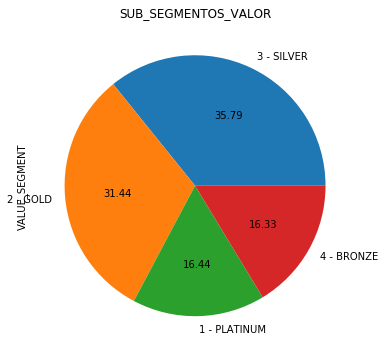

In [32]:
# Gráfico de tarta de SEGMENTO DE VALOR
plot = datadef['VALUE_SEGMENT'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='SUB_SEGMENTOS_VALOR')

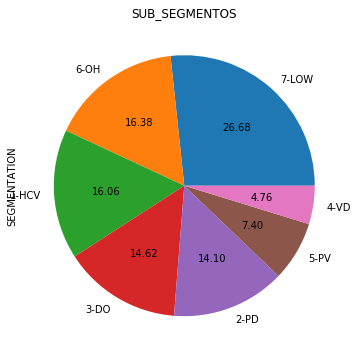

In [30]:
# Gráfico de tarta de SEGMENTOS
plot = datadef['SEGMENTATION'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='SUB_SEGMENTOS')

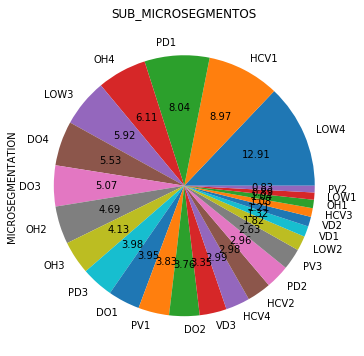

In [31]:
# Gráfico de tarta de MICROSEGMENTACION
plot = datadef['MICROSEGMENTATION'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='SUB_MICROSEGMENTOS')

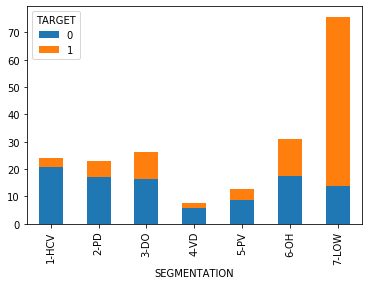

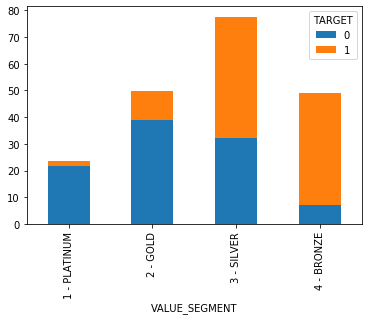

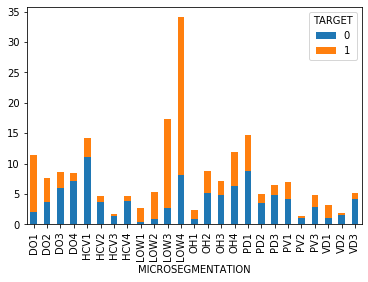

In [34]:
#Relación entre el Target y los distintos Medios de Segmentación, mostrando la posible continuación con el cliente.

#SEGMENTACIÓN VS TARGET
plot = pd.crosstab(index=datadef['SEGMENTATION'],
            columns=datadef['TARGET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
#SEGMENTO DE VALOR VS TARGET
plot = pd.crosstab(index=datadef['VALUE_SEGMENT'],
            columns=datadef['TARGET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
#MICROSEGMENTACIÓN VS TARGET
plot = pd.crosstab(index=datadef['MICROSEGMENTATION'],
            columns=datadef['TARGET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

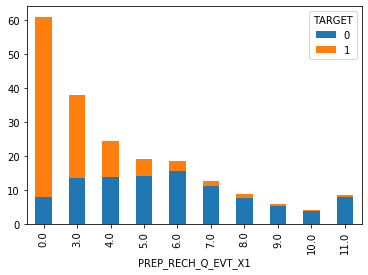

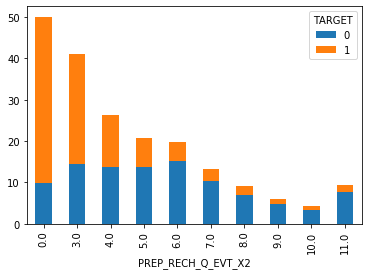

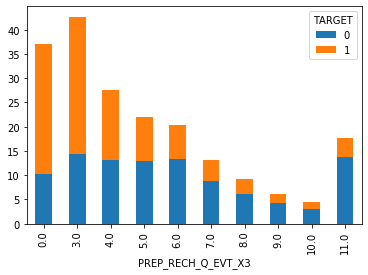

In [101]:
#Cantidad de Recargas Acumuladas en el Mes 1 respecto al TARGET
plot = pd.crosstab(index=datadef['PREP_RECH_Q_EVT_X1'],
            columns=datadef['TARGET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
#Cantidad de Recargas Acumuladas en el Mes 2 respecto al TARGET
plot = pd.crosstab(index=datadef['PREP_RECH_Q_EVT_X2'],
            columns=datadef['TARGET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)
#Cantidad de Recargas Acumuladas en el Mes 3 respecto al TARGET
plot = pd.crosstab(index=datadef['PREP_RECH_Q_EVT_X3'],
            columns=datadef['TARGET']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

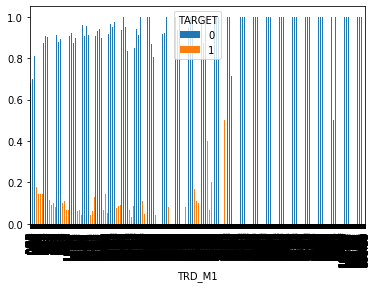

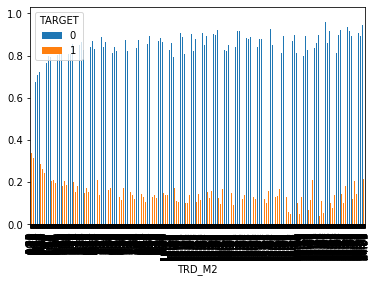

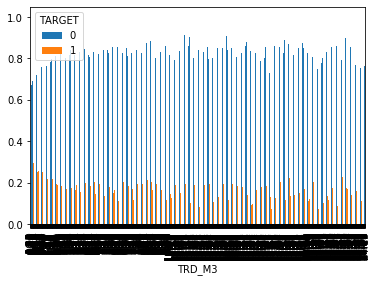

In [102]:
#Proporción de 0 y 1 en TRD

#Tráfico de Datos del Mes 1 respecto al TARGET
plot = pd.crosstab(index=datadef['TRD_M1'],
            columns=datadef['TARGET']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
#Tráfico de Datos del Mes 2 respecto al TARGET
plot = pd.crosstab(index=datadef['TRD_M2'],
            columns=datadef['TARGET']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')
#Tráfico de Datos del Mes 3 respecto al TARGET
plot = pd.crosstab(index=datadef['TRD_M3'],
            columns=datadef['TARGET']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')

In [12]:
datadef.shape

(965133, 45)

# -----------------------------------------------------------------------------------------------------------
# ETAPA 6: Entrenamiento y Predicción

In [3]:
from sklearn.model_selection import train_test_split 

In [4]:
y = datadef['TARGET']

In [41]:
columns = [col for col in datadef.columns if col not in ['SUSCRIBER_KEY','TARGET', 'VALUE_SEGMENT', 'SEGMENTATION', 
                                                         'MICROSEGMENTATION', 'DEVICE_VENDOR_NAME', 'NETWORK_TECH', 
                                                         'PREP_RECH_CHNNL_MODE12W']]

In [38]:
x = datadef[columns]

NameError: name 'columns' is not defined

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

NameError: name 'train_test_split' is not defined

In [33]:
def train(x_train,y_train):

    xgb_model = xgb.XGBClassifier()

    print("Comienza entrenamiento del modelo XGBoost")

    xgb_model.fit(x_train, y_train)

    print("Entrenamiento finalizado\n")

    print("Haciendo las predicciones\n\n")

    XGB_preds = xgb_model.predict(x_test)
    print(classification_report(y_test, XGB_preds))
    print(confusion_matrix(y_test, XGB_preds))
    return xgb_model

In [34]:
def predict(data_to_predict, xgb_model):
  
    print("\n\n-------------------------")
    print("Ingreso a la funcion de prediccion\n")

    XGB_preds = xgb_model.predict_proba(x)
    
    return XGB_preds

In [36]:

modelo = train(x_train, y_train)

NameError: name 'x_train' is not defined